# Preprocesamiento de datos Toy Datasets

Importar las librerías

In [1]:
import sys
import os
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits, load_diabetes, load_linnerud

current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from preprocess_data import Preprocesador


## Dataset Iris

- **Descripción**: Contiene medidas de flores de iris.
- **Variables**: `sepal length`, `sepal width`, `petal length`, `petal width`.
- **Variable objetivo**: `target` – especie de iris (`setosa`, `versicolor`, `virginica`).
- **Tipo de problema**: Clasificación multiclase (3 clases).

In [2]:
df_iris = pd.DataFrame(load_iris(as_frame=True).data)
df_iris.columns = load_iris(as_frame=True).feature_names
df_iris['target'] = load_iris(as_frame=True).target
df_iris['target'] = df_iris['target'].astype(str)
df_iris['target'] = df_iris['target'].replace({'0': 'setosa', '1': 'versicolor', '2': 'virginica'})

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data_preprocessor = Preprocesador(df_iris, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+-------------------+------------------+-------------------+------------------+--------+
|   | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target |
+---+-------------------+------------------+-------------------+------------------+--------+
| 0 |        5.1        |       3.5        |        1.4        |       0.2        | setosa |
| 1 |        4.9        |       3.0        |        1.4        |       0.2        | setosa |
| 2 |        4.7        |       3.2        |        1.3        |       0.2        | setosa |
| 3 |        4.6        |       3.1        |        1.5        |       0.2        | setosa |
| 4 |        5.0        |       3.6        |        1.4        |       0.2        | setosa |
+---+-------------------+------------------+-------------------+------------------+--------+


 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



 Estadísticas descriptivas:

+-------+-------------------+--------------------+--------------------+--------------------+
|       | sepal length (cm) |  sepal width (cm)  | petal length (cm)  |  petal width (cm)  |
+-------+-------------------+--------------------+--------------------+--------------------+
| count |       150.0       |       150.0        |       150.0        |       150.0        |
| mean  | 5.843333333333334 | 3.0573333333333337 | 3.7580000000000005 | 1.1993333333333336 |
|  std  | 0.828066127977863 | 0.4358662849366982 | 1.7652982332594662 | 0.7622376689603465 |
|  min  |        4.3        |        2.0         |        1.0         |        0.1         |
|  25%  |        5.1        |        2.8         |        1.6         |        0.3         |
|  50%  |        5.8        |        3.0         |        4.35        |        1.3         |
|  75%  |        6.4        |        3.3         |        5.1         |        1.8         |
|  max  |        7.9        |        4.4         |        6.9         

 Valores nulos por columna:

+-------------------+---------------+
|                   | Valores nulos |
+-------------------+---------------+
| sepal length (cm) |       0       |
| sepal width (cm)  |       0       |
| petal length (cm) |       0       |
| petal width (cm)  |       0       |
|      target       |       0       |
+-------------------+---------------+


 Valores duplicados:

Duplicados: 1


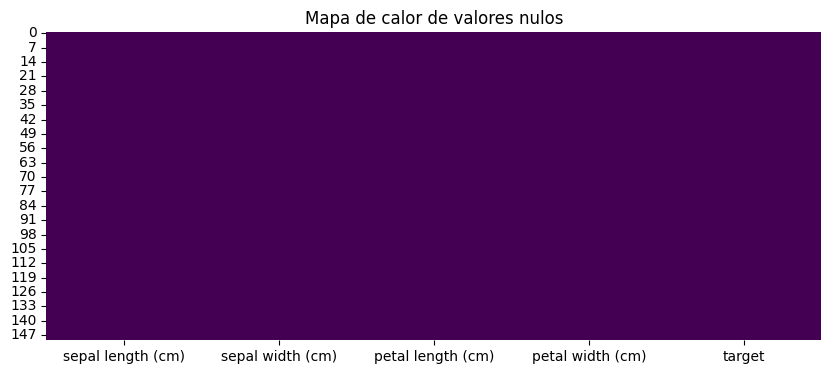

 Distribución de clases en la variable objetivo:

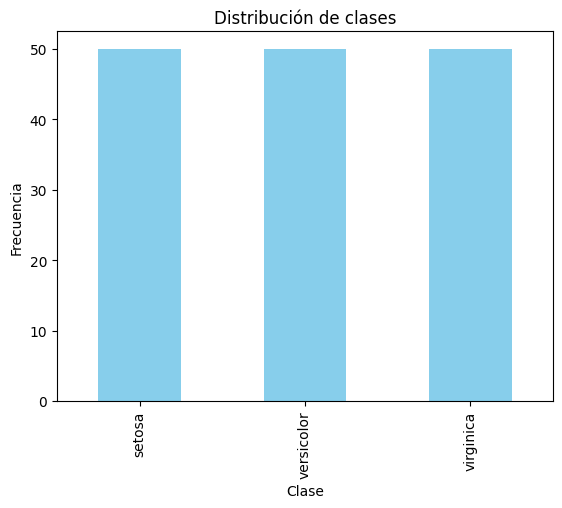

 Columnas categóricas:

[]


 Columnas numéricas:

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


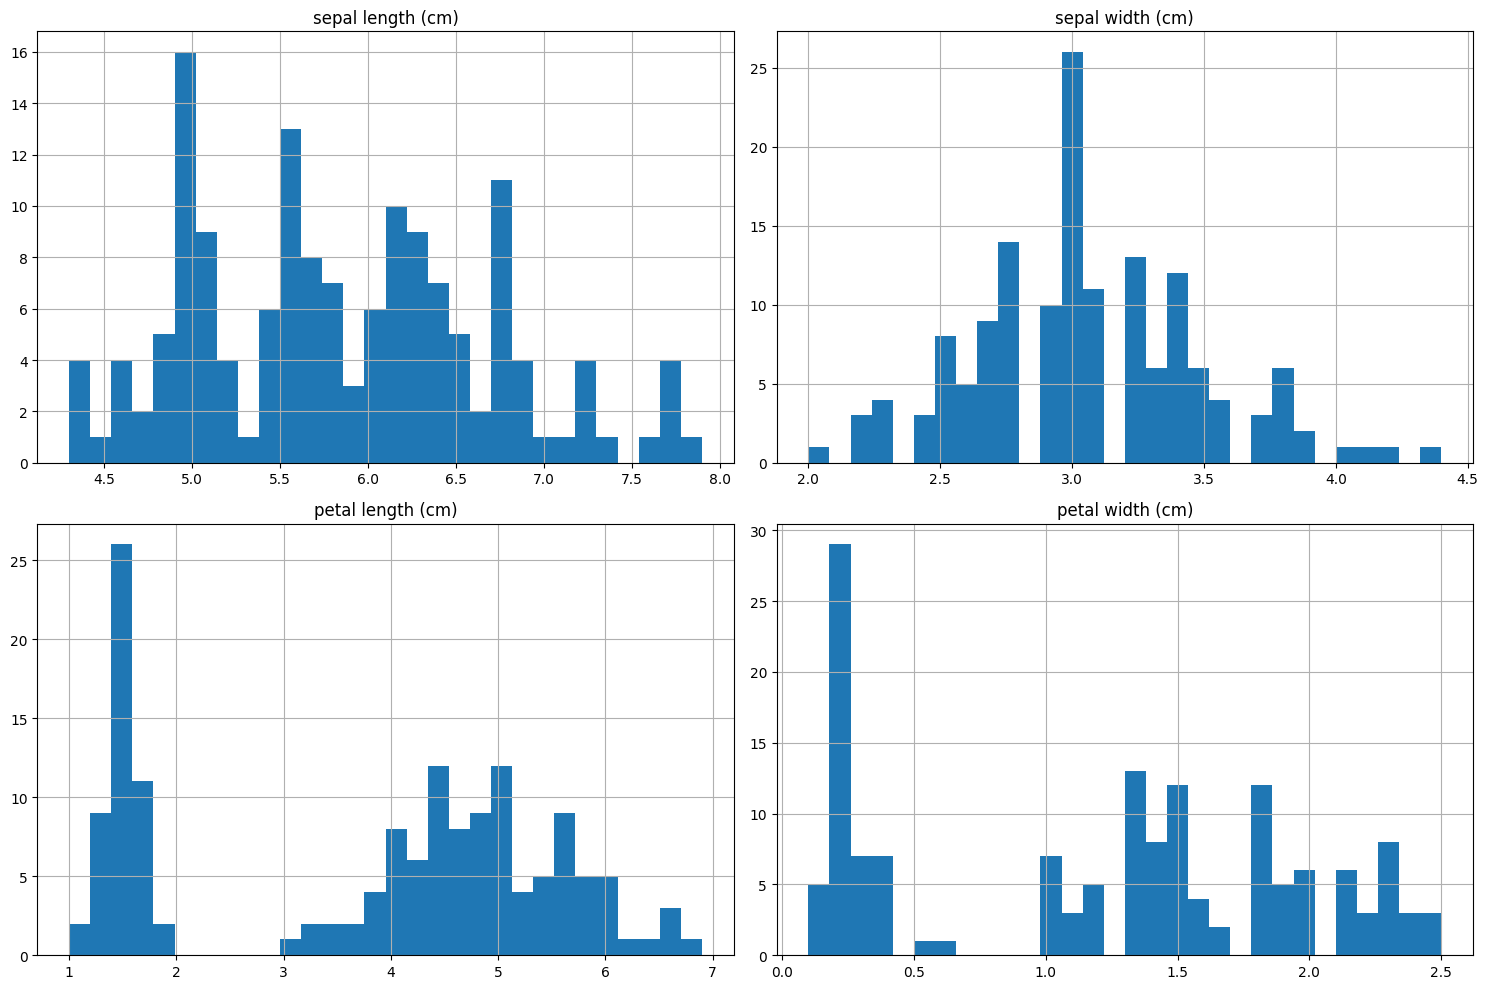

 Outliers detectados por z-score (>3):

+-------------------+----------------+
|                   | Outliers (z>3) |
+-------------------+----------------+
| sepal length (cm) |       0        |
| sepal width (cm)  |       1        |
| petal length (cm) |       0        |
| petal width (cm)  |       0        |
+-------------------+----------------+


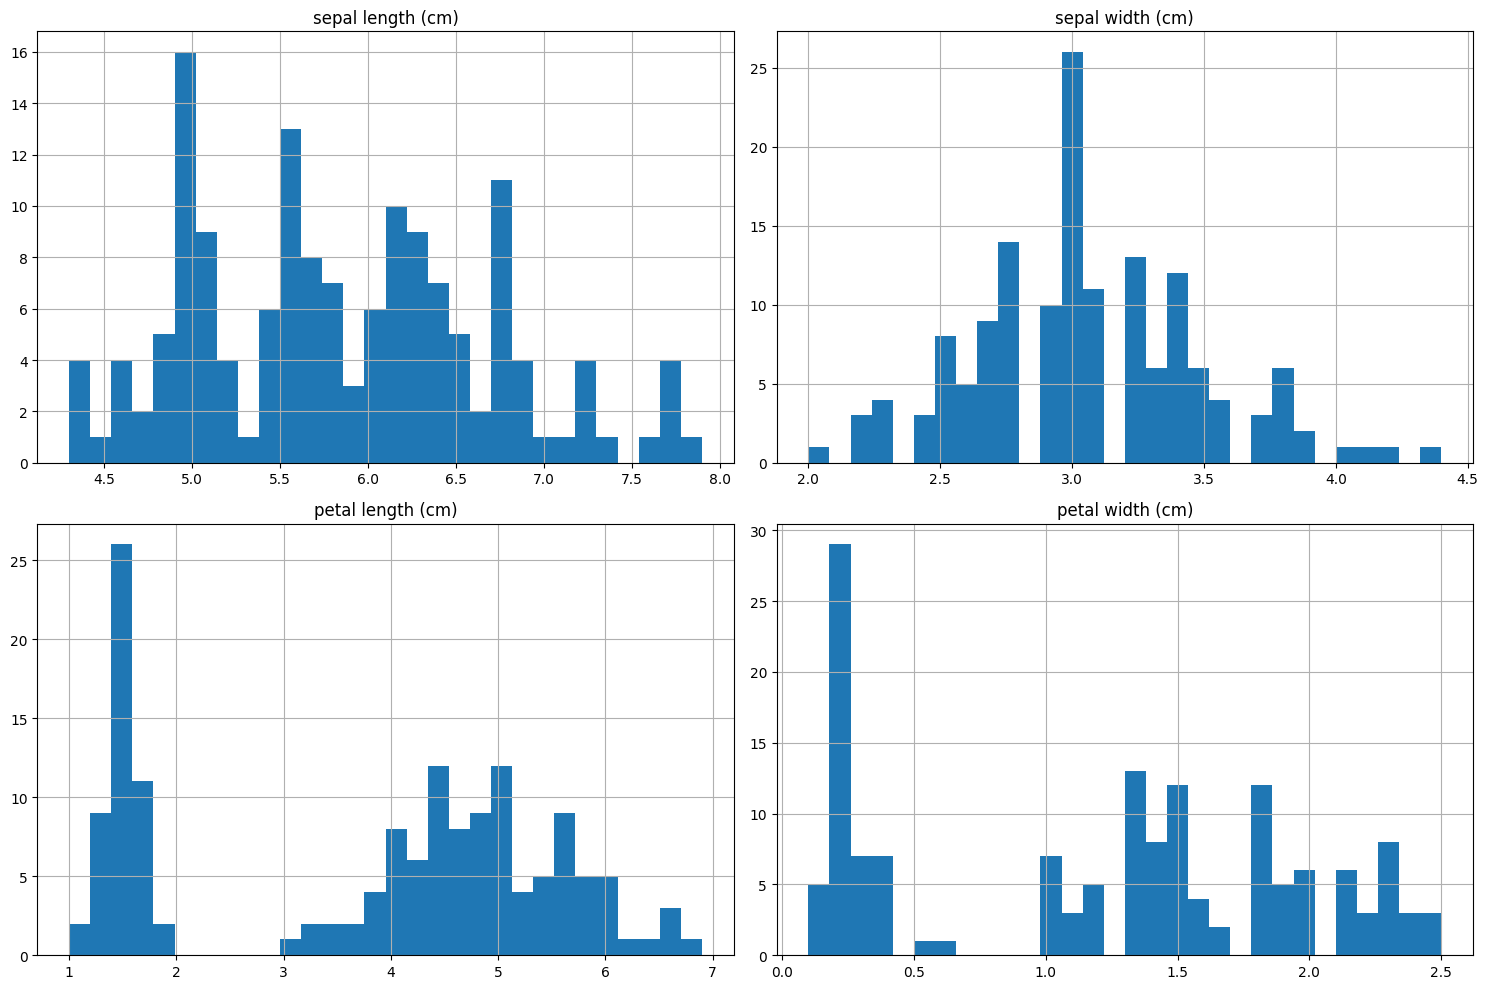

In [4]:
data_preprocessor.explorar_datos()

### 2. Reducción de Dimensionalidad

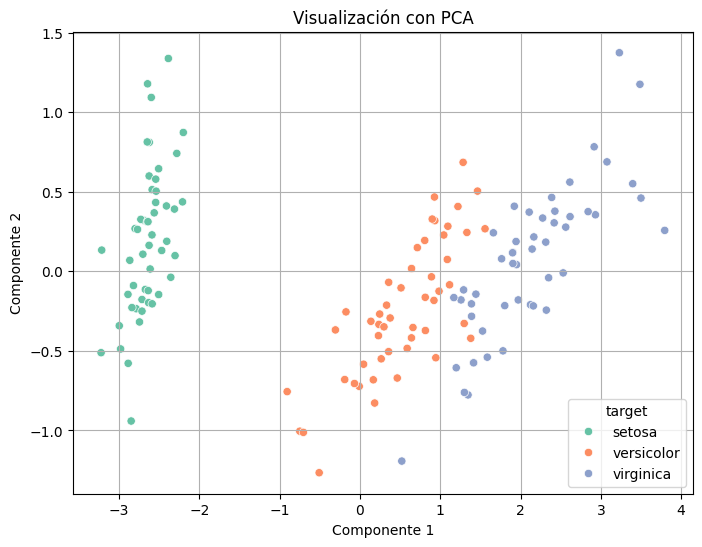

In [5]:
data_preprocessor.reducir_dimensionalidad()

### 3.  División del Dataset

In [6]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = data_preprocessor.dividir_datos()

Train: (120, 4), Test: (30, 4)


## Dataset Diabetes

- **Descripción**: Datos médicos de pacientes para predecir la progresión de la diabetes.
- **Variables**: 10 predictores numéricos (e.g., `bmi`, `bp`, `s5`, ...).
- **Variable objetivo**: `target` – medida continua de progresión de la enfermedad.
- **Tipo de problema**: Regresión.

In [7]:
df_diabetes = pd.DataFrame(load_diabetes(as_frame=True).data)
df_diabetes.columns = load_diabetes(as_frame=True).feature_names
df_diabetes['target'] = load_diabetes(as_frame=True).target
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
data_preprocessor = Preprocesador(df_diabetes, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+------------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+--------+
|   |          age           |          sex          |          bmi          |          bp          |          s1           |          s2           |          s3           |          s4           |          s5          |          s6           | target |
+---+------------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+--------+
| 0 |  0.038075906433423026  |  0.05068011873981862  | 0.061696206518683294  |  0.0218723855140367  | -0.04422349842444599  | -0.03482076283769895  | -0.04340084565202491  | -0.002592261998183278 | 0.019907486170462722 | -0.01764612515980

 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB



 Estadísticas descriptivas:

+-------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+------------------------+-------------------------+------------------------+------------------------+------------------------+--------------------+
|       |          age           |          sex           |           bmi           |           bp            |           s1            |           s2           |           s3            |           s4           |           s5           |           s6           |       target       |
+-------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+------------------------+-------------------------+------------------------+------------------------+------------------------+--------------------+
| count |         442.0          |         442.0          |          442.0          |          442.0          |          442.0          |        

 Valores nulos por columna:

+--------+---------------+
|        | Valores nulos |
+--------+---------------+
|  age   |       0       |
|  sex   |       0       |
|  bmi   |       0       |
|   bp   |       0       |
|   s1   |       0       |
|   s2   |       0       |
|   s3   |       0       |
|   s4   |       0       |
|   s5   |       0       |
|   s6   |       0       |
| target |       0       |
+--------+---------------+


 Valores duplicados:

Duplicados: 0


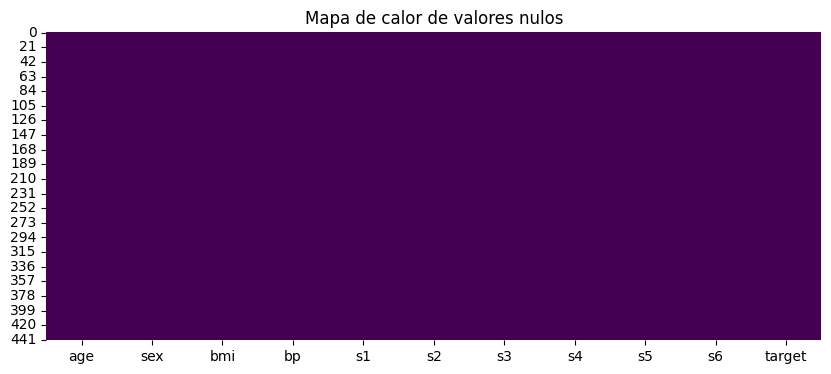

 Columnas categóricas:

[]


 Columnas numéricas:

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


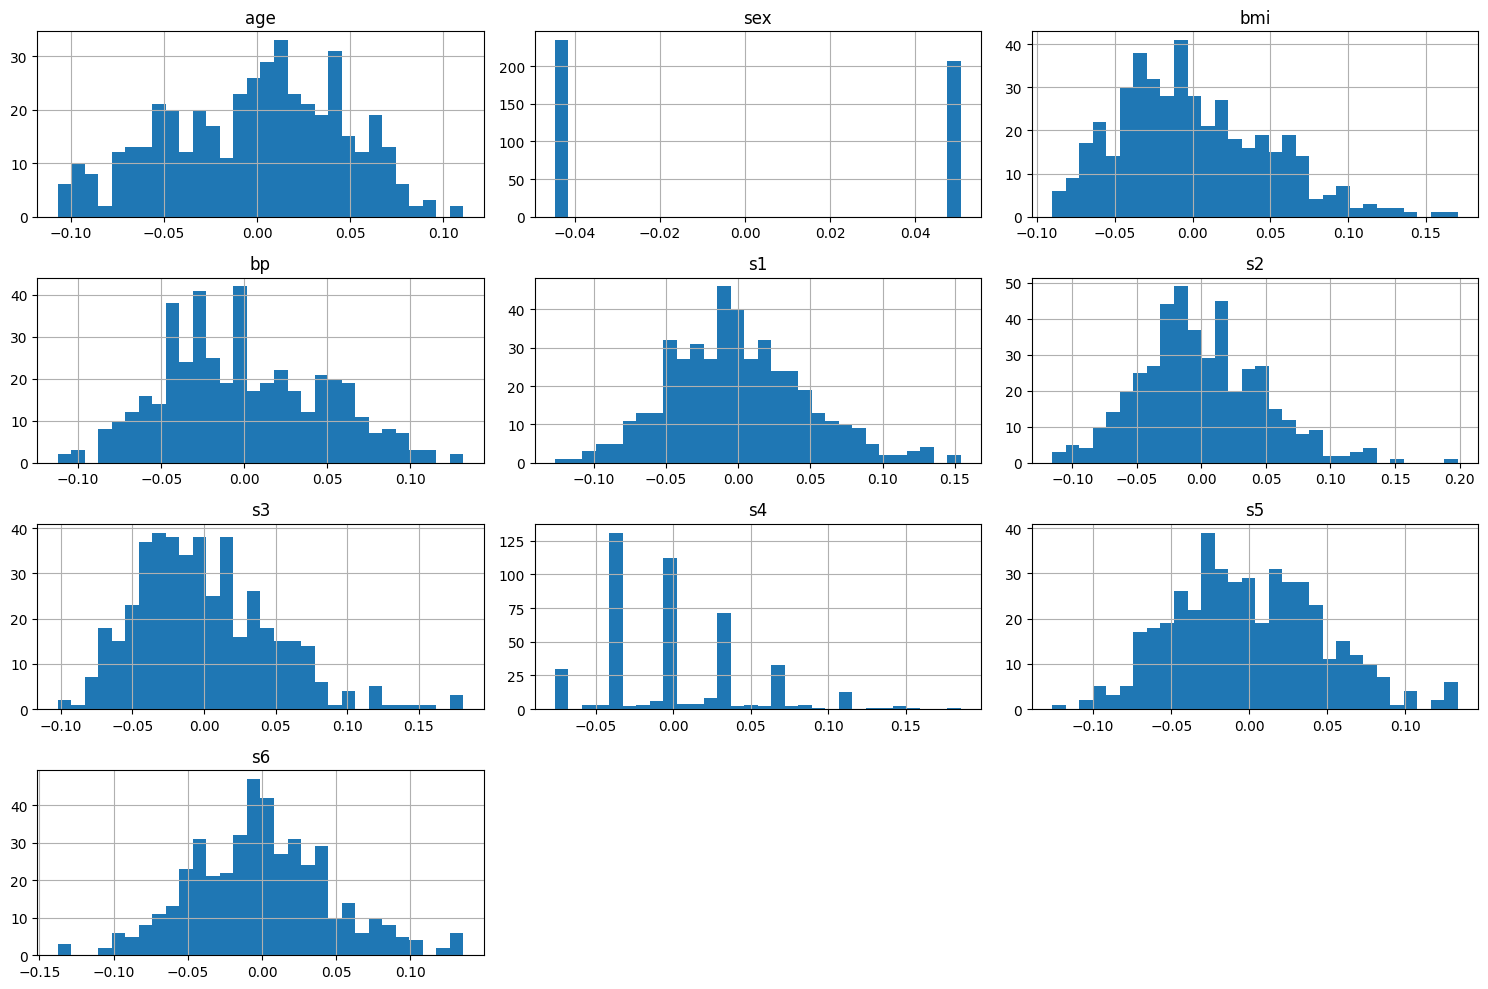

 Outliers detectados por z-score (>3):

+-----+----------------+
|     | Outliers (z>3) |
+-----+----------------+
| age |       0        |
| sex |       0        |
| bmi |       2        |
| bp  |       0        |
| s1  |       2        |
| s2  |       2        |
| s3  |       5        |
| s4  |       4        |
| s5  |       0        |
| s6  |       0        |
+-----+----------------+


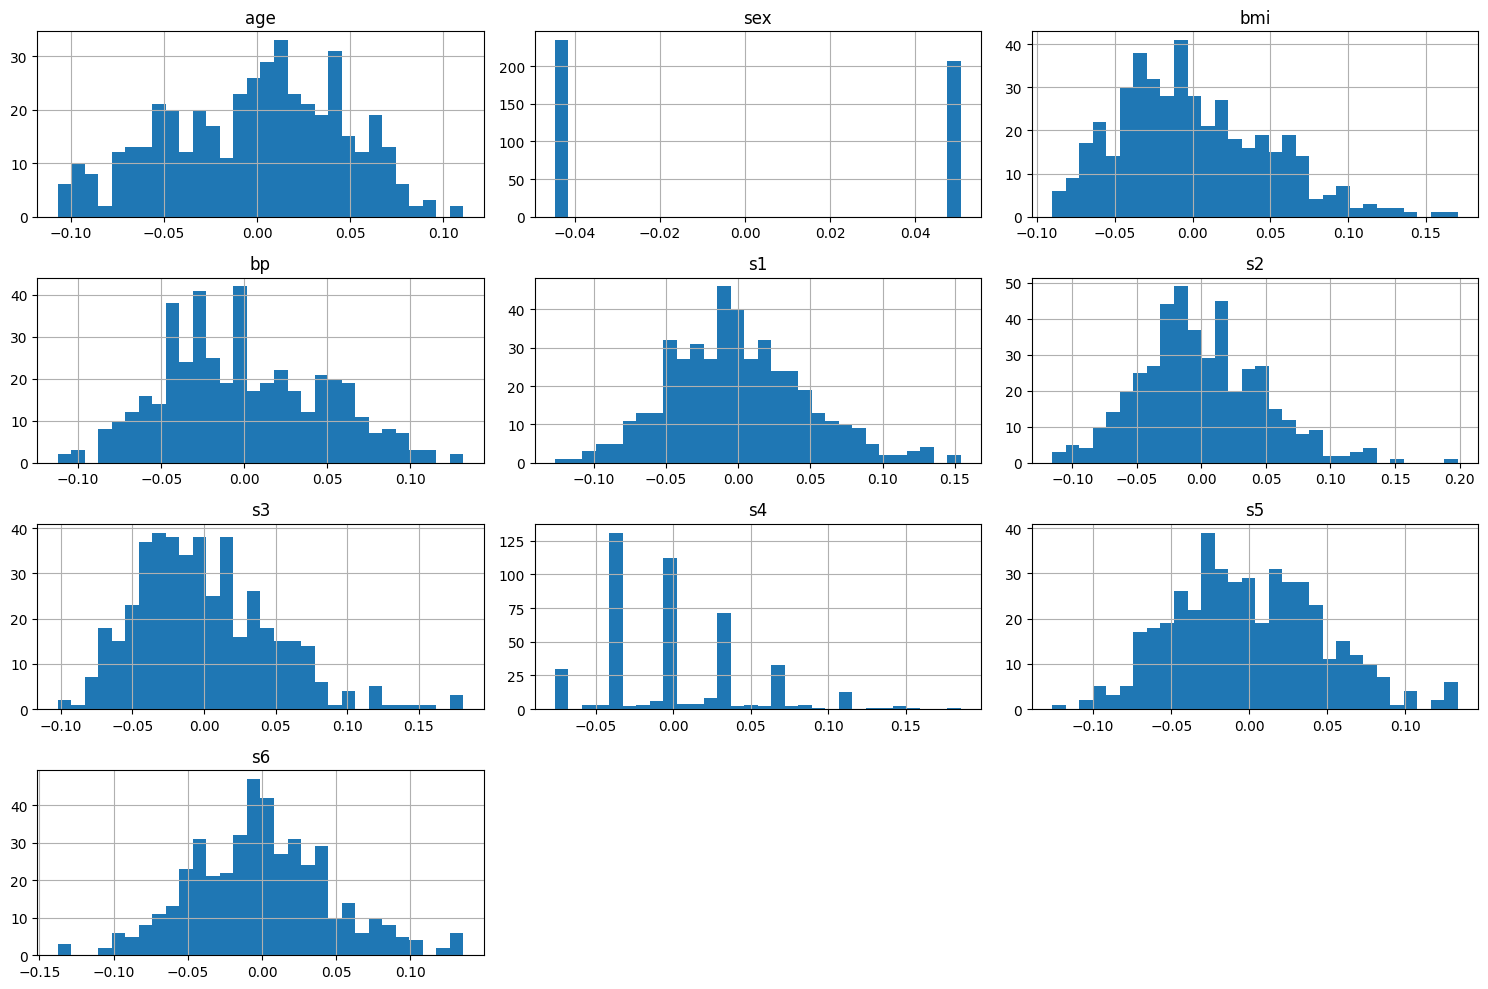

In [9]:
data_preprocessor.explorar_datos()

### 2. Limpieza

In [10]:
data_preprocessor.manejar_outliers(['bmi', 's1', 's2', 's3', 's4'])

 Outliers en 'bmi': 3 reemplazados por -0.007283766209687899

Valores fuera de rango: [0.16085492 0.13714305 0.17055523]

  Rango: [-0.13244469328909578, 0.1294636406639386]
  Reemplazando outliers por mediana (-0.007283766209687899)


 Outliers en 's1': 8 reemplazados por -0.004320865536613489

Valores fuera de rango: [0.15253776 0.13327442 0.12639466 0.15391371 0.12777061 0.1250187
 0.1250187  0.12777061]

  Rango: [-0.12815662277471435, 0.12226679741788964]
  Reemplazando outliers por mediana (-0.004320865536613489)


 Outliers en 's2': 7 reemplazados por -0.0038190651205350003

Valores fuera de rango: [0.19878799 0.13146107 0.15588665 0.12801644 0.1251981  0.12739014
 0.13020848]

  Rango: [-0.12066258492575518, 0.12014858219039709]
  Reemplazando outliers por mediana (-0.0038190651205350003)


 Outliers en 's3': 7 reemplazados por -0.006584467611155497

Valores fuera de rango: [0.13331777 0.18117906 0.15172596 0.17749742 0.15908923 0.14068104
 0.17381578]

  Rango: [-0.1317601529501115, 0.1259544933359744]
  Reemplazando outliers por mediana (-0.006584467611155497)


 Outliers en 's4': 2 reemplazados por -0.002592261998183278

Valores fuera de rango: [0.18523444 0.15534454]

  Rango: [-0.15019674550182333, 0.14501222150545676]
  Reemplazando outliers por mediana (-0.002592261998183278)


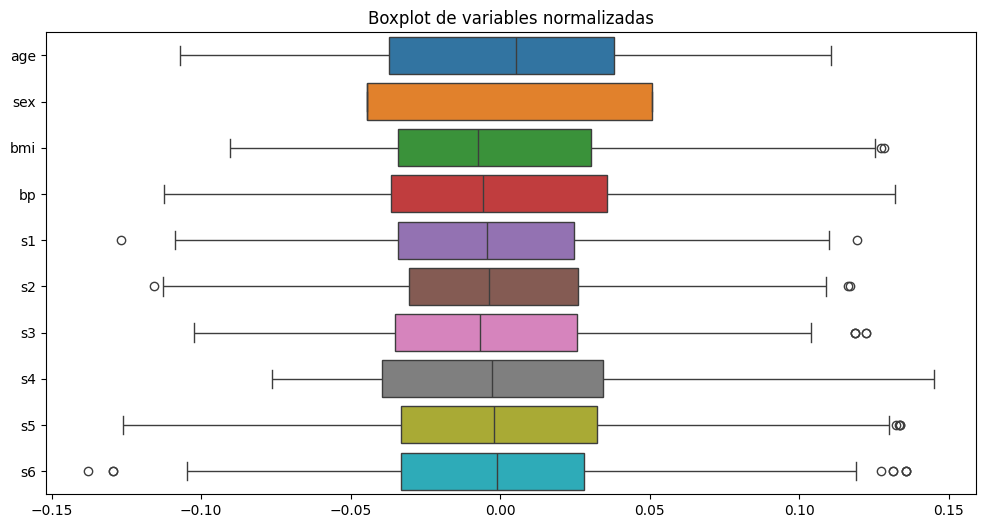

In [11]:
data_preprocessor.plot_boxplot()

### 3.  División del Dataset

In [12]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = data_preprocessor.dividir_datos()

Train: (353, 10), Test: (89, 10)


## Dataset Digits

- **Descripción**: Imágenes en escala de grises de dígitos escritos a mano (8x8).
- **Variables**: 64 píxeles (`pixel_0`, ..., `pixel_63`).
- **Variable objetivo**: `target` – dígito entre 0 y 9.
- **Tipo de problema**: Clasificación multiclase (10 clases).

In [13]:
df_digits = pd.DataFrame(load_digits(as_frame=True).data)
df_digits.columns = load_digits(as_frame=True).feature_names
df_digits['target'] = load_digits(as_frame=True).target
df_digits['target'] = df_digits['target'].astype(str)
df_digits.sample(5, random_state=42)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0,6
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0,9
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0,3
438,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0,7
1270,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0,2


In [14]:
data_preprocessor = Preprocesador(df_digits, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------+
|   | pixel_0_0 | pixel_0_1 | pixel_0_2 | pixel_0_3 | pixel_0_4 | pixel_0_5 | pixel_0_6 | pixel_0_7 | pixel_1_0 | pixel_1_1 | pixel_1_2 | pixel_1_3 | pixel_1_4 | pixel_1_5 | pixel_1_6 | pixel_1_7 | pixel_2_0 | pixel_2

 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

 Estadísticas descriptivas:

+-------+-----------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+----------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+---------------------+-----------------------+--------------------+-------------------+--------------------+------------------+-------------------+-------------------+---------------------+-----------------------+--------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-----------------------+-----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------+----------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------

 Valores nulos por columna:

+-----------+---------------+
|           | Valores nulos |
+-----------+---------------+
| pixel_0_0 |       0       |
| pixel_0_1 |       0       |
| pixel_0_2 |       0       |
| pixel_0_3 |       0       |
| pixel_0_4 |       0       |
| pixel_0_5 |       0       |
| pixel_0_6 |       0       |
| pixel_0_7 |       0       |
| pixel_1_0 |       0       |
| pixel_1_1 |       0       |
| pixel_1_2 |       0       |
| pixel_1_3 |       0       |
| pixel_1_4 |       0       |
| pixel_1_5 |       0       |
| pixel_1_6 |       0       |
| pixel_1_7 |       0       |
| pixel_2_0 |       0       |
| pixel_2_1 |       0       |
| pixel_2_2 |       0       |
| pixel_2_3 |       0       |
| pixel_2_4 |       0       |
| pixel_2_5 |       0       |
| pixel_2_6 |       0       |
| pixel_2_7 |       0       |
| pixel_3_0 |       0       |
| pixel_3_1 |       0       |
| pixel_3_2 |       0       |
| pixel_3_3 |       0       |
| pixel_3_4 |       0       |
| pixel_3_5 |       0       |
| pixel_3_

 Valores duplicados:

Duplicados: 0


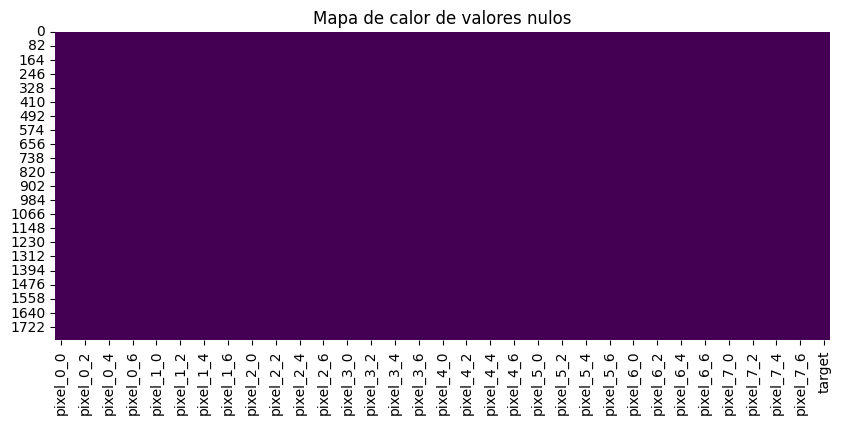

 Distribución de clases en la variable objetivo:

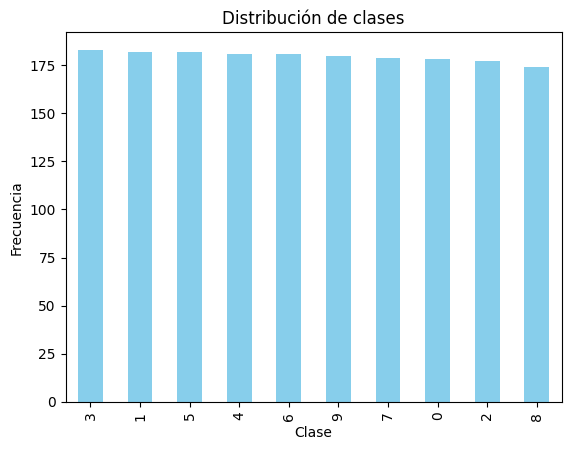

 Columnas categóricas:

[]


 Columnas numéricas:

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


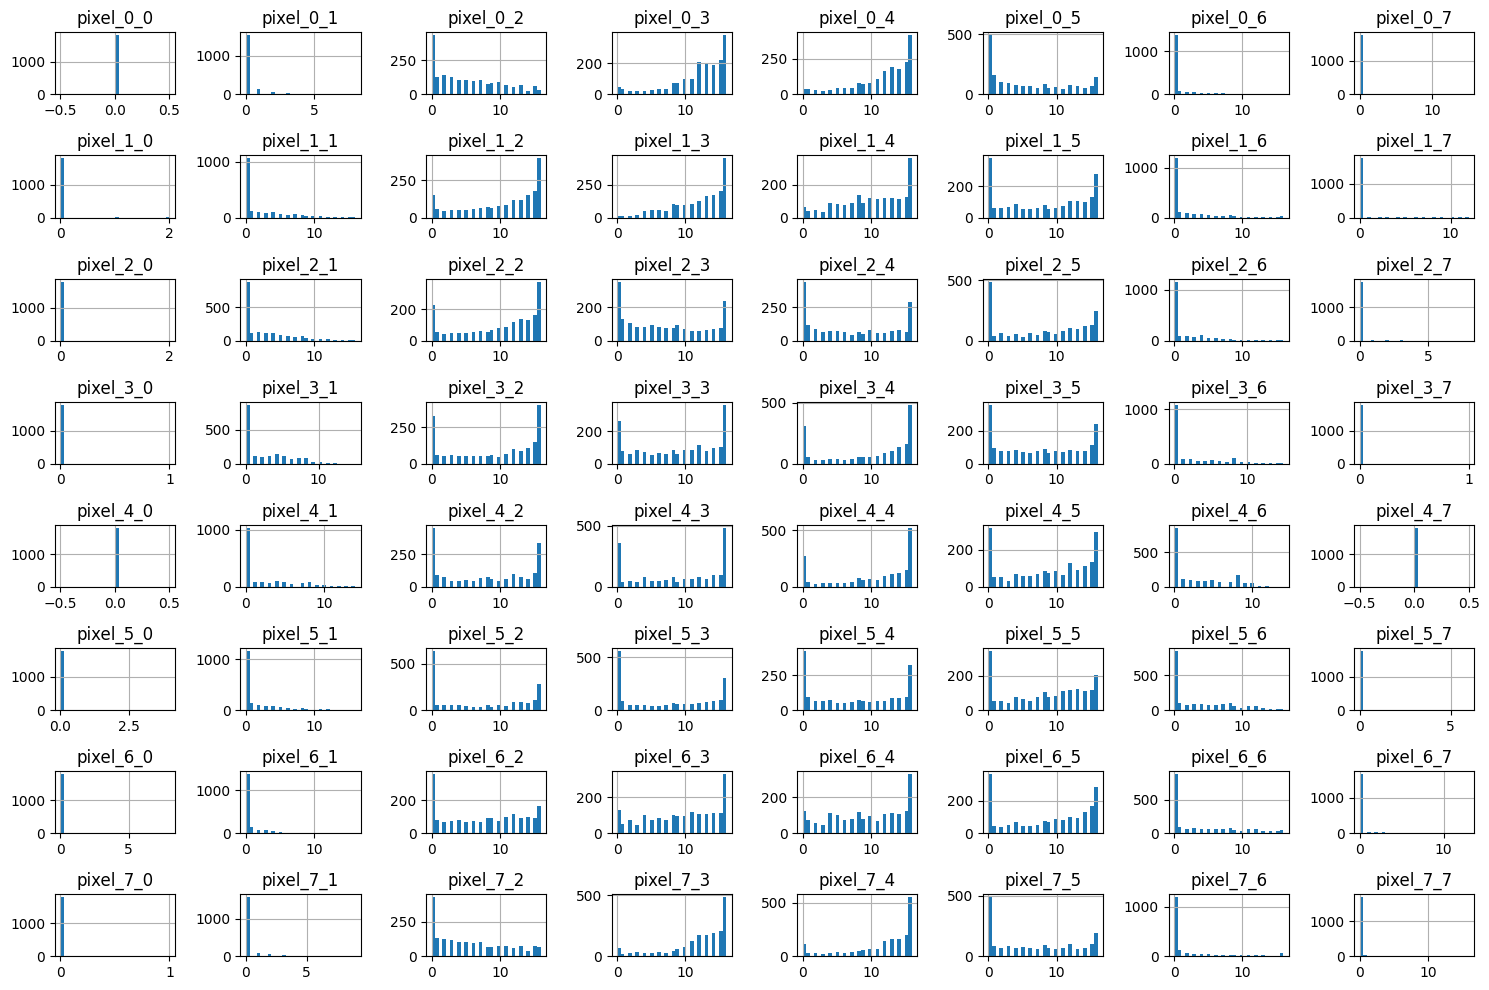

 Outliers detectados por z-score (>3):

+-----------+----------------+
|           | Outliers (z>3) |
+-----------+----------------+
| pixel_0_0 |       0        |
| pixel_0_1 |       39       |
| pixel_0_2 |       0        |
| pixel_0_3 |       0        |
| pixel_0_4 |       0        |
| pixel_0_5 |       0        |
| pixel_0_6 |       65       |
| pixel_0_7 |       22       |
| pixel_1_0 |       7        |
| pixel_1_1 |       35       |
| pixel_1_2 |       0        |
| pixel_1_3 |       12       |
| pixel_1_4 |       0        |
| pixel_1_5 |       0        |
| pixel_1_6 |       54       |
| pixel_1_7 |       26       |
| pixel_2_0 |       4        |
| pixel_2_1 |       23       |
| pixel_2_2 |       0        |
| pixel_2_3 |       0        |
| pixel_2_4 |       0        |
| pixel_2_5 |       0        |
| pixel_2_6 |       51       |
| pixel_2_7 |       21       |
| pixel_3_0 |       2        |
| pixel_3_1 |       21       |
| pixel_3_2 |       0        |
| pixel_3_3 |       0        |
| pixel_3_4 |       0        |
| pixel_

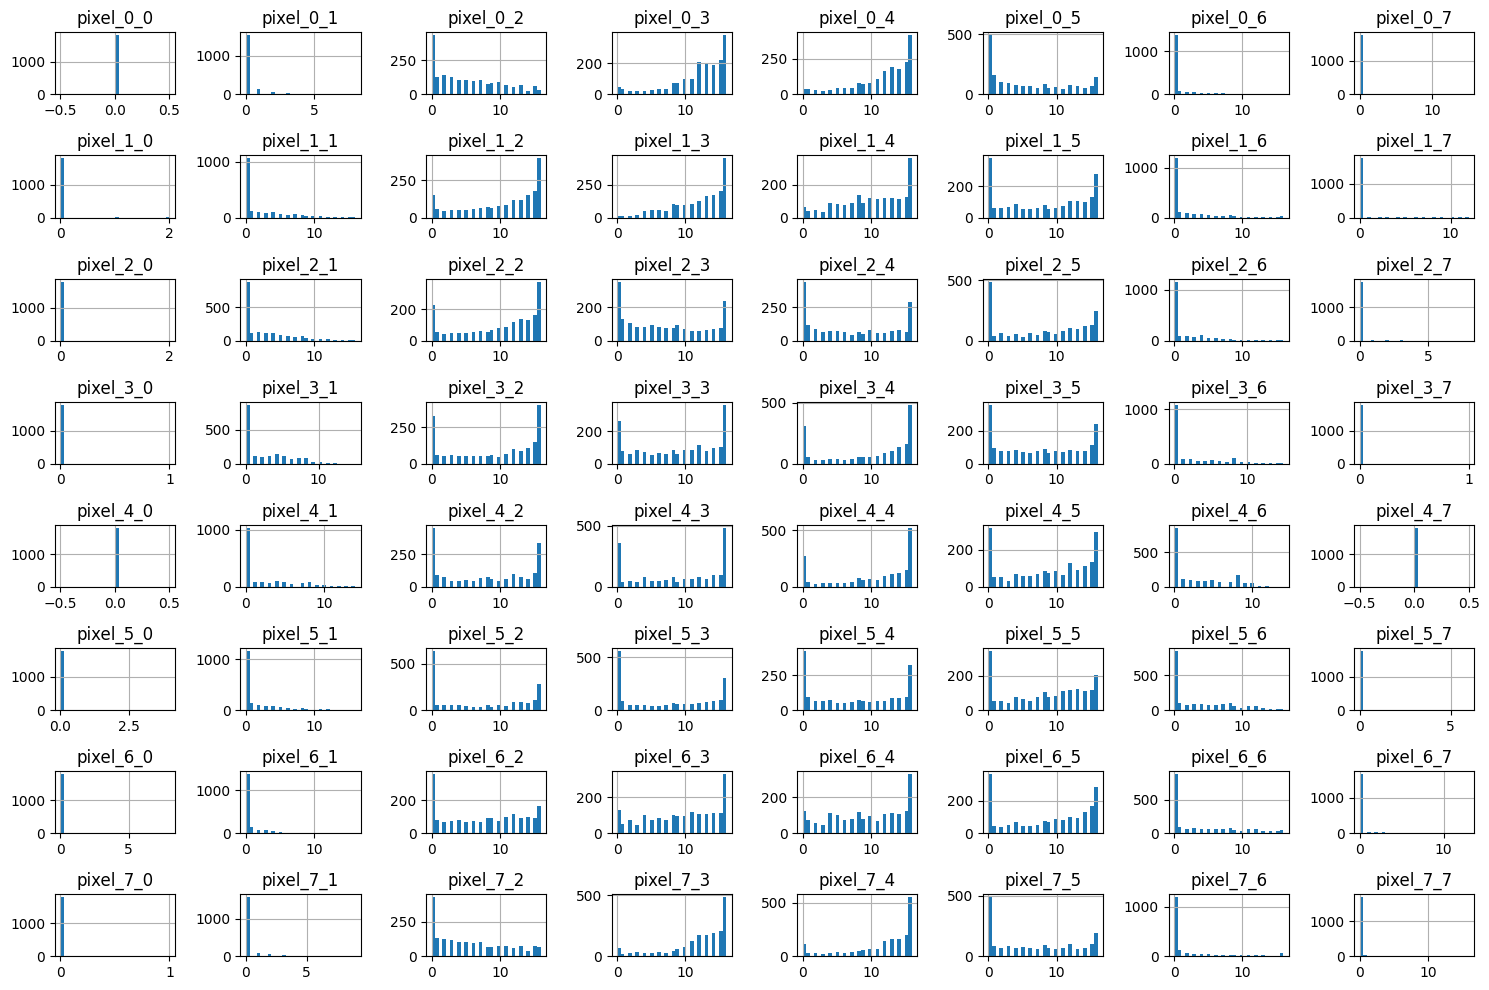

In [15]:
data_preprocessor.explorar_datos()

### 2. Limpieza

In [16]:
cols_outliers = ['pixel_0_1','pixel_0_6','pixel_0_7','pixel_1_0','pixel_1_1','pixel_1_3','pixel_1_6','pixel_1_7','pixel_2_0','pixel_2_1','pixel_2_6','pixel_2_7','pixel_3_0','pixel_3_1','pixel_3_6','pixel_3_7','pixel_4_1','pixel_4_6','pixel_5_0','pixel_5_1','pixel_5_7','pixel_6_0','pixel_6_1','pixel_6_7','pixel_7_0','pixel_7_1','pixel_7_6','pixel_7_7']

data_preprocessor.manejar_outliers(cols_outliers)

 Outliers en 'pixel_0_1': 266 reemplazados por 0.0

Valores fuera de rango: [2. 5. 1. 2. 6. 3. 1. 1. 1. 3. 1. 1. 3. 2. 1. 4. 1. 2. 4. 2. 2. 3. 4. 6.
 4. 1. 2. 5. 6. 2. 1. 7. 1. 4. 2. 1. 2. 2. 4. 2. 1. 2. 3. 2. 2. 3. 4. 1.
 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 3. 3. 4. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 3. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 2. 1. 2. 3. 1. 1. 3. 2. 2. 1. 1.
 3. 3. 1. 1. 2. 5. 4. 1. 1. 1. 5. 1. 1. 1. 4. 1. 2. 2. 1. 1. 3. 1. 3. 3.
 1. 1. 3. 3. 1. 3. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 3. 3. 2. 1. 1. 1. 2. 1. 5. 1. 1. 1. 3. 3. 1. 1. 1. 2.
 2. 1. 4. 1. 2. 2. 2. 2. 1. 1. 3. 1. 1. 1. 7. 4. 2. 1. 2. 1. 2. 2. 4. 1.
 8. 4. 3. 5. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 4. 1. 2. 1. 2. 1. 3. 1.
 5. 1. 2. 1. 1. 1. 4. 2. 4. 1. 5. 2. 3. 1. 2. 1. 3. 8. 2. 2. 4. 3. 2. 2.
 2. 2. 1. 2. 1. 4. 7. 1. 1. 1. 1. 1. 2. 4. 1. 5. 4. 2. 1. 4. 2. 1. 2. 3.
 1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_0_6': 428 reemplazados por 0.0

Valores fuera de rango: [15.  1.  3.  2.  2.  4.  2. 11.  1.  4.  5.  2.  1.  6.  3.  1.  1.  5.
  4.  1.  1.  1.  1.  2.  3.  2.  2.  2.  8.  6.  3.  5.  4.  3.  5.  1.
 10.  2.  7. 13. 11.  2.  1.  5.  3.  5.  5.  7.  1.  6.  1.  5.  5.  1.
  1.  8.  7.  1. 16.  1.  9.  1.  1. 16.  2.  1.  3.  1.  1.  1. 10. 11.
  4.  2.  3. 16.  9.  4.  1.  1.  2.  2.  1.  2.  3.  8. 14.  3. 10.  4.
  1.  6.  3. 12.  6.  3.  8. 12.  1. 14. 15.  5.  7.  1. 11. 15. 16. 14.
  9. 16.  3. 11. 13.  1. 14. 12.  7.  6.  7.  1.  4. 16. 10. 15.  1.  9.
 12. 14.  2.  2.  4.  5.  2.  7. 12.  1. 13.  1.  4.  4.  2.  4.  6.  3.
  1.  7. 16.  1.  5.  2.  3.  3.  2.  1. 14.  6.  3.  3.  2.  4. 11.  7.
 11. 16. 11.  2.  1. 16. 14. 10. 11.  8.  2. 14.  9. 11. 15. 16.  1.  9.
  7.  7.  3.  1.  2.  9. 14.  1. 10.  3.  8.  1.  5.  2.  4. 16.  3. 10.
  1.  6.  5.  1. 14.  1.  5. 16. 10.  7.  1.  1. 14.  2.  6. 11.  9. 15.
 15.  1. 10.  4.  7. 11. 12.  1. 10.  1.  1. 10.  3.  1.  9. 11.  3.  5.
  2.  4. 12.  3.  7.  3.  3.  3.  4.  3. 14.  4. 10. 12.  8. 16.  1.  1.
  2.  7. 11.  6. 13.  6. 12.  7.  4.  6.  1.  3.  9.  8. 14. 12. 11.  4.
  6.  3.  6. 12.  3. 14.  4. 15.  7.  4.  6. 16.  3.  7.  1. 16.  2. 14.
  2.  1.  2.  1.  6.  4. 15.  1.  1. 11. 10.  1.  2.  4.  4. 14.  7.  2.
  1.  2.  2.  4.  8.  2.  3. 11.  3.  3.  2.  7.  4. 15.  7.  2.  1.  2.
  7.  2. 10.  1.  3.  4.  1.  3.  1.  2.  7.  1.  1.  1.  1.  5.  4.  2.
  5.  1.  6. 10.  1. 16.  2.  1. 15.  6.  6.  8.  1.  6.  5.  3. 16.  1.
  2. 13.  7.  4.  4.  2.  7.  2.  1.  4.  3.  4.  6.  7.  8.  6. 12.  5.
  7.  3.  3.  3.  5.  1.  7.  3. 11. 16. 15.  1.  8.  2. 11.  1.  3.  6.
  3.  3.  5.  1.  1.  2.  5.  1.  2.  3.  3.  3.  8.  1.  2. 15.  8. 15.
  5.  2.  1.  5.  1.  8.  4.  2.  1.  4.  1.  1.  1.  1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_0_7': 48 reemplazados por 0.0

Valores fuera de rango: [ 1. 10. 10. 11.  2.  7. 10.  3.  6.  1.  2. 13.  2.  5.  2. 12.  5.  2.
  2.  4. 12.  2.  2.  1.  9.  1.  2. 14.  2.  1.  2.  1.  4.  1. 10.  8.
  1.  5.  3.  7.  8.  1.  1.  6. 15.  2.  1.  1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_1_0': 7 reemplazados por 0.0

Valores fuera de rango: [1. 1. 1. 1. 2. 2. 2.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_1_1': 156 reemplazados por 0.0

Valores fuera de rango: [ 8. 11.  8.  9. 12.  9.  8.  9. 11. 12.  8.  9.  8. 10.  9. 12. 10. 10.
  8.  8.  8. 10. 10.  8. 11.  8.  8. 11.  8. 12.  8.  8.  8.  9.  9.  9.
 12.  8.  8.  8.  8. 11.  9.  8. 13. 10. 14.  8.  8. 14.  8. 11.  9. 10.
  8. 12. 12.  8.  8.  8.  9.  8.  9.  8. 10.  8. 13. 14.  8.  8. 11.  8.
 12.  8. 12. 10. 12. 11.  9. 12. 13. 14.  9. 10. 12. 10.  8.  9. 10. 10.
 11. 10.  9. 11. 11. 10. 11. 11. 13. 10.  8.  8. 10. 16. 15. 11. 13. 12.
 14. 11.  8. 10.  8.  8. 13. 10.  8. 10. 11. 14.  8. 11. 11.  8. 10. 13.
 11.  9. 14.  8.  9.  9.  9.  9. 12. 11. 13.  9.  8. 15.  8. 12. 10. 11.
 14.  8. 12. 11.  8.  8.  8. 11.  8.  8. 11. 10.]

  Rango: [-4.5, 7.5]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_1_6': 237 reemplazados por 0.0

Valores fuera de rango: [12.  6.  8. 12. 11.  6.  7.  8. 11.  8. 12.  8.  6.  8.  6.  7.  9.  8.
  8.  8.  7.  8. 15.  7.  7.  8.  9.  7.  7. 11. 10. 15. 11.  6.  6.  7.
 16. 11.  7. 16.  8.  8.  7.  8.  7. 11.  9. 15.  7.  6.  8.  7.  8. 14.
 12. 12.  7. 11. 16.  7.  9. 16.  7. 15.  7.  7. 16. 15. 13. 16. 14.  8.
  7. 16. 16.  7. 16.  6. 16. 15. 13.  8. 16.  6.  6. 13.  8.  8. 12. 15.
  8.  8.  8.  9.  8.  8. 16. 16. 13. 11. 14. 12. 10. 13. 11. 10. 16. 16.
 11.  9. 13.  7.  8. 16.  7.  9. 15.  8. 13. 14. 14.  8. 14. 16.  9. 12.
 16.  8. 15.  7.  7. 11. 10. 16. 10. 10. 10.  7. 14.  9.  8. 12.  7.  8.
  6. 15.  9. 12.  8.  8.  8.  6.  6. 10.  9. 14.  7.  6. 15.  9.  9.  8.
  6.  8.  9. 10.  8. 11.  6.  7.  9. 12. 10. 11.  7.  9.  7. 16. 10.  8.
  9.  8. 12.  6.  8. 12. 15.  6. 10.  9. 13.  8. 11.  8.  7.  6. 16.  9.
  6.  8.  7.  9.  9. 10.  9. 10. 10. 11.  8.  6. 11. 10.  8. 16. 16. 14.
  9. 10.  8. 12.  7.  6.  8. 14. 14. 11. 12.  8.  7. 12.  9. 11. 10.  9.
  7. 12.  6.]

  Rango: [-3.0, 5.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_1_7': 49 reemplazados por 0.0

Valores fuera de rango: [ 3.  2.  5.  8.  5.  5.  6.  5.  3.  5.  9.  1.  6.  1.  7.  3.  1.  3.
  1. 12.  6.  1. 10.  2.  1.  4.  1.  1.  2.  2.  1.  1.  1.  7.  2.  1.
  9.  5.  3.  6. 11.  1.  1.  1.  2. 10.  2.  8.  1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_2_0': 4 reemplazados por 0.0

Valores fuera de rango: [1. 1. 2. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_2_1': 89 reemplazados por 1.0

Valores fuera de rango: [14. 12. 11. 11. 11. 11. 12. 14. 16. 11. 11. 15. 12. 13. 11. 16. 11. 12.
 15. 12. 12. 14. 12. 14. 13. 12. 11. 11. 14. 16. 11. 13. 11. 11. 11. 13.
 12. 12. 12. 11. 12. 11. 11. 12. 14. 13. 13. 13. 11. 14. 12. 12. 11. 12.
 11. 15. 13. 13. 12. 16. 15. 14. 12. 13. 12. 12. 11. 12. 11. 11. 14. 11.
 13. 11. 11. 11. 11. 13. 13. 14. 12. 12. 11. 14. 14. 16. 12. 15. 15.]

  Rango: [-6.0, 10.0]
  Reemplazando outliers por mediana (1.0)


 Outliers en 'pixel_2_6': 128 reemplazados por 0.0

Valores fuera de rango: [ 8.  9. 11. 10.  9. 10.  8. 12.  8. 10.  8. 12.  9.  9.  8.  8.  8. 12.
 11.  8.  8.  8.  8. 11.  8.  8.  8. 16. 10. 12. 14. 11. 12. 14. 10. 14.
  8. 16. 14. 11.  8. 11.  9. 12.  9.  8.  8. 11.  8.  8. 15. 11. 14.  8.
  9.  8. 16. 13. 11.  8. 15. 12. 10. 12. 12. 14. 16. 10. 10.  9.  9. 10.
  9. 14.  8.  8.  9. 12. 16. 16. 14. 16.  8. 10. 15. 16. 15. 16. 15. 16.
 16. 16. 13. 15. 16. 15. 15.  9. 15.  9. 16. 11.  8.  9.  8. 12.  8. 11.
 10. 11.  8.  8. 11. 12. 10. 11. 12.  8. 12.  8. 11. 11.  9. 12. 14. 15.
 13.  9.]

  Rango: [-4.5, 7.5]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_2_7': 33 reemplazados por 0.0

Valores fuera de rango: [1. 1. 1. 1. 2. 2. 1. 3. 5. 4. 4. 2. 1. 3. 2. 1. 5. 3. 5. 3. 4. 4. 6. 1.
 8. 2. 1. 1. 3. 3. 1. 1. 5.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_3_0': 2 reemplazados por 0.0

Valores fuera de rango: [1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_3_1': 37 reemplazados por 1.0

Valores fuera de rango: [15. 11. 12. 12. 11. 15. 14. 11. 12. 11. 12. 12. 13. 12. 11. 11. 11. 12.
 11. 14. 11. 12. 11. 11. 12. 11. 11. 11. 14. 13. 12. 12. 11. 12. 12. 11.
 13.]

  Rango: [-6.0, 10.0]
  Reemplazando outliers por mediana (1.0)


 Outliers en 'pixel_3_6': 79 reemplazados por 0.0

Valores fuera de rango: [11. 11. 14. 15. 15. 12. 15. 11. 12. 14. 14. 11. 12. 12. 13. 14. 13. 11.
 13. 15. 14. 15. 15. 13. 14. 13. 15. 12. 15. 13. 12. 12. 13. 13. 12. 15.
 15. 15. 13. 15. 11. 13. 15. 12. 13. 12. 11. 15. 14. 12. 13. 11. 11. 13.
 12. 12. 11. 11. 15. 13. 12. 11. 11. 13. 11. 11. 13. 11. 11. 12. 12. 12.
 11. 13. 14. 15. 15. 12. 13.]

  Rango: [-6.0, 10.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_3_7': 4 reemplazados por 0.0

Valores fuera de rango: [1. 1. 1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_4_1': 66 reemplazados por 0.0

Valores fuera de rango: [12. 12. 12. 12. 11. 13. 12. 12. 12. 11. 11. 12. 14. 14. 13. 14. 14. 14.
 12. 14. 14. 11. 12. 12. 11. 11. 13. 12. 11. 13. 11. 11. 11. 11. 12. 12.
 14. 11. 11. 11. 12. 11. 12. 12. 12. 14. 14. 11. 14. 14. 11. 14. 11. 11.
 14. 13. 14. 13. 14. 12. 11. 13. 12. 11. 13. 13.]

  Rango: [-6.0, 10.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_5_0': 9 reemplazados por 0.0

Valores fuera de rango: [2. 4. 1. 1. 3. 2. 1. 1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_5_1': 181 reemplazados por 0.0

Valores fuera de rango: [ 9.  8.  8.  8.  6.  7.  7.  9.  6. 11.  7.  8.  6.  6.  9.  8.  6.  8.
 11.  7.  7.  6.  6.  7.  6.  9. 12. 12.  6.  9. 10. 10.  6. 11.  6.  6.
 10.  6.  8.  9.  8.  7.  6. 10.  8.  6.  6.  9. 13. 10. 14. 11.  7. 11.
  6.  7.  6.  7.  7. 11.  7.  9.  6.  7.  6.  6.  7.  6.  6. 16.  8.  6.
 14. 15.  8.  8.  7. 16.  6. 12.  8.  6. 12. 10.  8. 11. 16. 12. 13. 11.
  8. 16. 16.  8.  6. 13. 16.  6.  8.  7.  7.  6. 16. 11. 14.  6. 11.  6.
  7.  8.  7.  6.  8. 12.  6.  7.  8.  9.  6.  8. 15. 10. 11.  8.  7.  8.
  9.  9.  6.  7.  8.  7.  8. 12. 10.  7. 16. 13.  9. 13. 11. 13. 10.  7.
 12.  7.  7.  8.  8.  6. 11. 13.  8. 14. 12.  8.  6.  6.  8.  7.  6. 14.
  8.  6.  6.  6.  7. 13.  8.  6. 16. 15.  6. 10.  8. 15. 15.  8. 16. 12.
 12.]

  Rango: [-3.0, 5.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_5_7': 22 reemplazados por 0.0

Valores fuera de rango: [1. 1. 1. 2. 1. 1. 1. 4. 2. 2. 1. 3. 4. 1. 6. 5. 6. 3. 1. 1. 1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_6_0': 4 reemplazados por 0.0

Valores fuera de rango: [3. 1. 1. 8.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_6_1': 421 reemplazados por 0.0

Valores fuera de rango: [ 2.  3.  1.  1.  1.  1.  1.  4.  1.  4.  3.  4.  5.  4.  1.  1.  1.  3.
  2.  1.  6.  1.  1.  1.  2.  1.  2.  9.  4.  4.  8.  2.  3.  3.  1.  3.
  5.  3.  1.  2.  1.  1.  3.  1.  1.  5.  1.  1.  1.  2.  3.  1.  1.  3.
  1.  1.  5.  2.  4.  1.  1.  1.  1.  3.  1.  1.  1.  2.  5.  1.  3.  7.
  1.  8.  3.  1.  4.  3.  1.  1.  3.  1.  2.  4.  1.  1.  2.  1.  3.  5.
  4.  5.  2.  1.  2.  1.  7.  1.  1.  3.  1.  2.  1.  6.  4.  3.  7.  1.
  2. 10.  1.  2.  1.  4.  3.  2. 11.  5.  2.  6.  2.  1. 16.  2.  2.  3.
  2.  6.  1.  3.  5.  3.  2.  8.  5.  1.  1.  1.  3.  2.  1.  1.  6.  9.
  1.  1.  6.  1.  3.  2.  1.  3.  2.  3.  6.  1. 15.  2.  5.  3.  1.  1.
  4.  2.  4.  5.  2.  9.  2.  3.  3.  3.  1. 10.  1.  1.  3.  1.  3.  5.
  5.  2.  8.  4.  5.  5.  5. 13.  3.  4.  1.  2.  3.  1.  4. 11.  2.  6.
  3.  8.  2.  1. 11.  4.  4.  5.  5. 10.  1.  6.  2.  1.  3.  6.  2.  2.
  2.  2.  3.  2.  1.  1.  1. 13.  3.  1.  3.  4.  8.  4.  2.  1.  2.  1.
  1.  1. 16.  3.  3.  2. 10.  3.  1.  5.  4.  3.  3.  2.  2.  4.  6.  4.
  4.  2.  3.  1.  3.  1.  4.  2.  1.  7.  2.  4.  5.  6.  1.  1.  1.  1.
  1.  2.  1.  3.  1.  4.  4.  5.  2.  2.  5.  1.  3.  2.  2.  1.  3.  1.
  9.  5.  4.  2.  4.  5.  1.  1.  6.  4.  1.  1.  5.  2.  1.  7.  3.  4.
 11.  2.  3.  1.  2.  1.  4.  2.  2.  3.  3.  1.  5.  1.  4.  3.  2.  1.
  1.  2.  5.  1.  3.  1.  2.  1.  2.  2.  1.  4.  2.  1.  1.  1.  4.  5.
  1.  1.  1.  1.  1.  4.  4.  4.  2.  2.  3.  4.  3.  1.  2.  3.  5.  2.
  4.  1.  3.  3.  1.  1.  2.  1.  1.  3.  3.  1.  1.  4.  2.  1.  4.  1.
  3.  1.  5.  1.  5.  1.  8.  2.  1.  2.  1.  3.  2.  1.  2.  7.  1.  2.
  3.  2.  4.  2.  1.  3.  2.  6.  4.  3.  2.  4.  3.  4.  1.  1.  3.  1.
  7.  4.  7.  1.  3.  1.  8.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_6_7': 116 reemplazados por 0.0

Valores fuera de rango: [ 2.  2.  2.  2.  2.  4.  2.  2.  1.  3.  6.  1.  5.  1.  1.  4.  6.  8.
  9.  3.  4.  2.  3. 10.  7.  9.  5.  3.  7.  5. 13.  2.  3.  2.  2.  2.
  6.  3.  2.  1.  1.  3.  3.  5.  4.  5.  4.  1.  4.  2.  5.  5.  1.  1.
  2.  4.  2.  3.  3.  1.  1.  1.  1.  1.  1.  1.  3.  2.  6.  4.  6.  3.
  5.  2.  3.  3.  5.  2.  1.  5.  3.  6.  2.  1.  1.  1.  2.  2.  2.  5.
  1.  2.  1.  3.  3.  7.  4.  1.  5.  1.  1.  1.  1.  1.  8.  1.  3.  3.
  4.  4.  1.  1. 10.  4.  1.  2.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_7_0': 1 reemplazados por 0.0

Valores fuera de rango: [1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_7_1': 219 reemplazados por 0.0

Valores fuera de rango: [2. 4. 2. 4. 1. 1. 1. 2. 3. 2. 2. 1. 5. 2. 3. 1. 3. 2. 3. 4. 1. 3. 5. 5.
 3. 2. 9. 2. 1. 4. 2. 3. 2. 1. 4. 1. 4. 3. 2. 3. 2. 1. 1. 2. 5. 4. 1. 3.
 2. 1. 1. 2. 2. 2. 1. 2. 2. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 4. 1. 1. 1. 1.
 1. 2. 1. 3. 2. 1. 2. 3. 1. 4. 1. 3. 1. 4. 3. 2. 1. 2. 1. 6. 3. 3. 1. 3.
 8. 3. 2. 1. 4. 1. 1. 1. 1. 2. 3. 2. 1. 1. 5. 2. 1. 3. 3. 1. 2. 1. 1. 2.
 1. 1. 3. 1. 1. 2. 2. 2. 2. 2. 1. 4. 2. 2. 3. 1. 1. 1. 4. 1. 2. 2. 3. 1.
 5. 5. 1. 1. 3. 4. 2. 4. 7. 1. 1. 1. 4. 1. 3. 1. 5. 1. 1. 3. 2. 1. 1. 1.
 2. 2. 4. 2. 1. 3. 1. 1. 4. 5. 3. 1. 2. 3. 3. 5. 1. 1. 2. 1. 2. 1. 2. 9.
 1. 5. 2. 2. 1. 1. 4. 9. 1. 1. 2. 2. 1. 1. 1. 1. 1. 6. 5. 2. 7. 2. 1. 2.
 4. 1. 1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_7_6': 267 reemplazados por 0.0

Valores fuera de rango: [ 9. 12. 11. 11. 13.  7. 11. 13. 13.  7.  9.  7.  9. 12. 11. 12.  6.  8.
 10.  7.  7.  8.  6.  9.  6.  6. 11.  7. 13. 15. 16.  6.  8. 10.  9. 16.
  7. 11.  8.  6. 13.  8.  7.  7.  8.  9. 11. 15.  9. 15.  9.  6. 13.  7.
 14. 16.  6.  6.  7. 14.  6.  9. 10.  6.  9. 11.  9.  8. 16. 16. 11.  9.
 16.  9.  9. 12. 12. 10. 12. 10.  6. 14. 16. 12. 10. 15. 13. 13. 16. 16.
 14. 13. 11.  9.  7. 15. 12. 15. 16. 11. 16. 16. 15.  8.  7. 15. 10. 12.
 10. 10. 16. 16. 14. 13.  7. 15. 16.  9.  8.  7.  6.  7. 10.  7. 12.  9.
  7.  9.  6. 10. 16. 16. 10.  7.  8. 16. 16. 12. 16.  7.  6. 16. 16. 11.
  6. 16.  8. 16. 16. 16. 16. 16.  6. 11. 16. 12. 15. 16. 16.  9. 16. 16.
 13.  6. 16. 13. 16.  8. 16. 14. 16. 11. 16. 11. 15.  6. 16.  8.  9.  8.
  7. 16. 16.  8.  9.  7. 15.  6. 16. 16. 16. 13. 11.  6.  8. 14. 16.  6.
 10.  8.  6. 16.  6. 11. 11. 12.  9.  8. 10. 13. 16.  8.  7. 10. 13. 11.
 12. 16.  6. 16. 12. 11.  8.  9.  6. 14. 16. 12. 16. 11. 13. 15. 12. 16.
 16. 16.  7.  7. 11.  6.  8.  7.  7.  7.  8.  6.  6. 11.  7.  9. 12. 10.
  6.  8. 16. 16.  6.  9. 12.  8.  7.  7.  6.  7.  8.  7.  9.]

  Rango: [-3.0, 5.0]
  Reemplazando outliers por mediana (0.0)


 Outliers en 'pixel_7_7': 110 reemplazados por 0.0

Valores fuera de rango: [ 4.  1.  1.  2.  1.  1.  2.  1.  6.  5.  1.  1. 15.  7.  1. 12.  5.  4.
 10.  3.  5.  8.  6. 11.  7.  3. 11. 11.  3.  2.  8.  9.  3.  1.  8. 16.
 14. 15.  2.  2.  1.  3.  9. 10.  2.  1.  9.  5.  3. 16. 14.  2. 11. 13.
  6. 16.  5. 11. 16. 12. 15.  8. 15. 12.  9.  1.  1.  1.  2.  9.  8.  5.
  1.  1.  5.  6.  5.  1.  1.  3. 13.  1.  6.  1.  2.  1.  1.  1.  1.  1.
  6. 16.  7.  8. 15. 10.  1.  3. 12.  1.  6.  7. 12.  1.  4.  3.  3.  7.
  2.  1.]

  Rango: [0.0, 0.0]
  Reemplazando outliers por mediana (0.0)


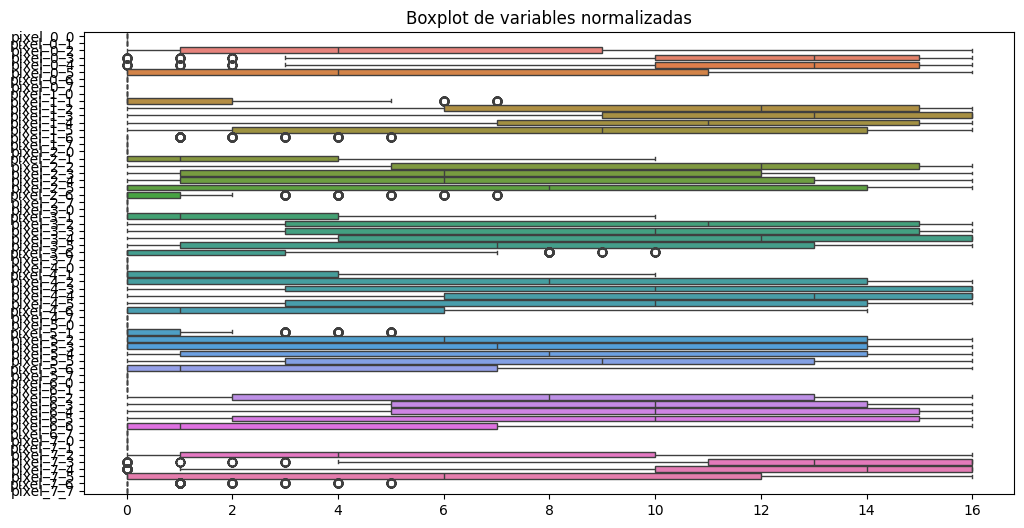

In [17]:
data_preprocessor.plot_boxplot()

### 3. Reducción de Dimensionalidad

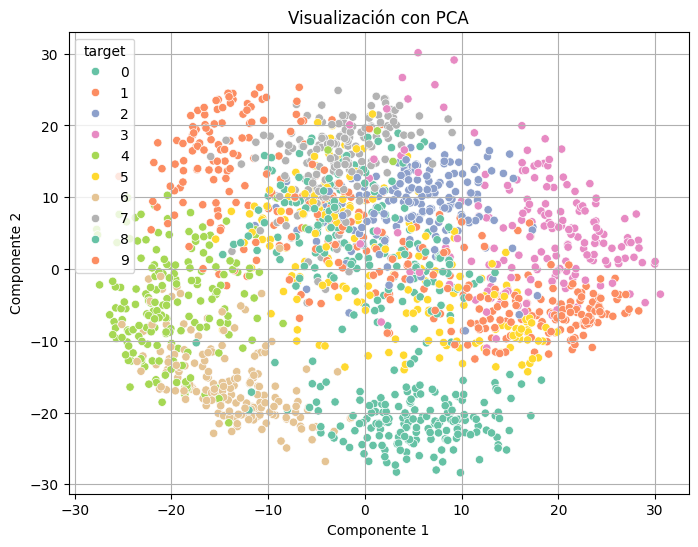

In [18]:
data_preprocessor.reducir_dimensionalidad()

### 4.  División del Dataset

In [19]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = data_preprocessor.dividir_datos()

Train: (1437, 64), Test: (360, 64)


## Dataset Linnerud

- **Descripción**: Datos fisiológicos de personas y su rendimiento físico.
- **Variables**: `Weight`, `Waist`, `Pulse`.
- **Variable objetivo**: `target` – cantidad de repeticiones de un ejercicio (`Chins`, `Situps`, `Jumps`) — en este caso, una de ellas.
- **Tipo de problema**: Regresión.

In [20]:
df_linnerud = pd.DataFrame(load_linnerud(as_frame=True).data)
df_linnerud.columns = load_linnerud(as_frame=True).feature_names
df_linnerud['target'] = load_linnerud(as_frame=True).target.iloc[:, 0]  # solo una salida para simplificar

In [21]:
data_preprocessor = Preprocesador(df_linnerud, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+-------+--------+-------+--------+
|   | Chins | Situps | Jumps | target |
+---+-------+--------+-------+--------+
| 0 |  5.0  | 162.0  | 60.0  | 191.0  |
| 1 |  2.0  | 110.0  | 60.0  | 189.0  |
| 2 | 12.0  | 101.0  | 101.0 | 193.0  |
| 3 | 12.0  | 105.0  | 37.0  | 162.0  |
| 4 | 13.0  | 155.0  | 58.0  | 189.0  |
+---+-------+--------+-------+--------+


 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   target  20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes



 Estadísticas descriptivas:

+-------+-------------------+-------------------+------------------+-------------------+
|       |       Chins       |      Situps       |      Jumps       |      target       |
+-------+-------------------+-------------------+------------------+-------------------+
| count |       20.0        |       20.0        |       20.0       |       20.0        |
| mean  |       9.45        |      145.55       |       70.3       |       178.6       |
|  std  | 5.286278165411395 | 62.56657506839793 | 51.2774701732488 | 24.69050531341104 |
|  min  |        1.0        |       50.0        |       25.0       |       138.0       |
|  25%  |       4.75        |       101.0       |       39.5       |      160.75       |
|  50%  |       11.5        |       122.5       |       54.0       |       176.0       |
|  75%  |       13.25       |       210.0       |      85.25       |       191.5       |
|  max  |       17.0        |       251.0       |      250.0       |       247.0       |
+-------+------------

 Valores nulos por columna:

+--------+---------------+
|        | Valores nulos |
+--------+---------------+
| Chins  |       0       |
| Situps |       0       |
| Jumps  |       0       |
| target |       0       |
+--------+---------------+


 Valores duplicados:

Duplicados: 0


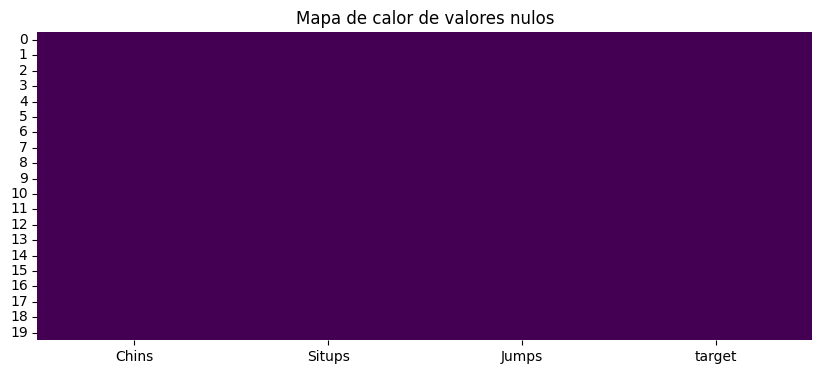

 Columnas categóricas:

[]


 Columnas numéricas:

['Chins', 'Situps', 'Jumps']


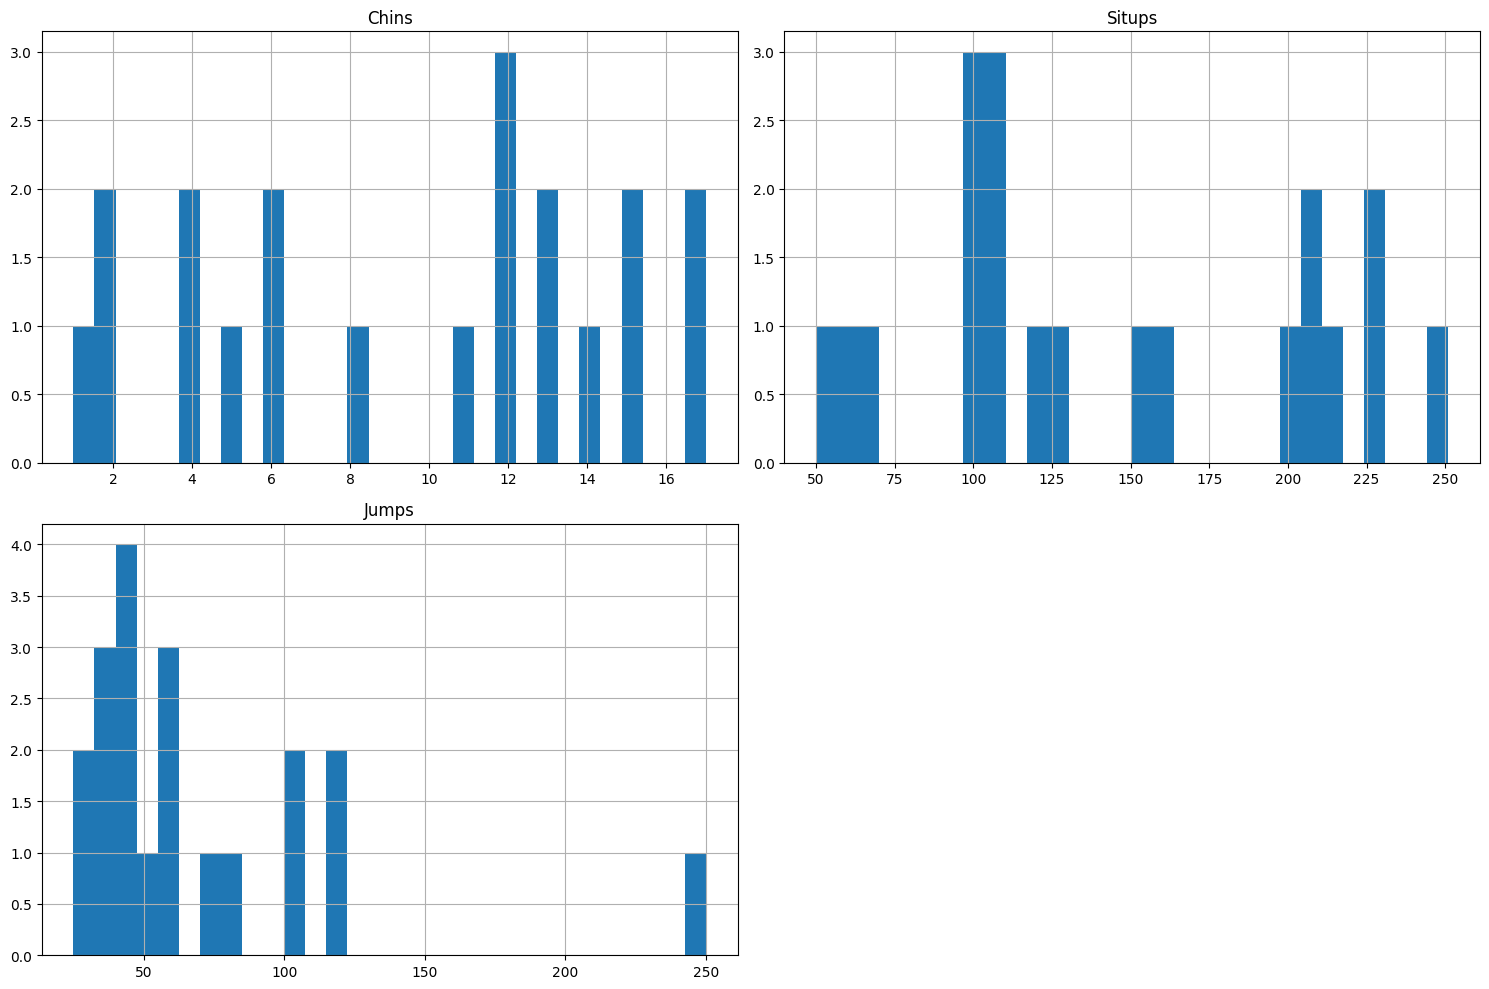

 Outliers detectados por z-score (>3):

+--------+----------------+
|        | Outliers (z>3) |
+--------+----------------+
| Chins  |       0        |
| Situps |       0        |
| Jumps  |       1        |
+--------+----------------+


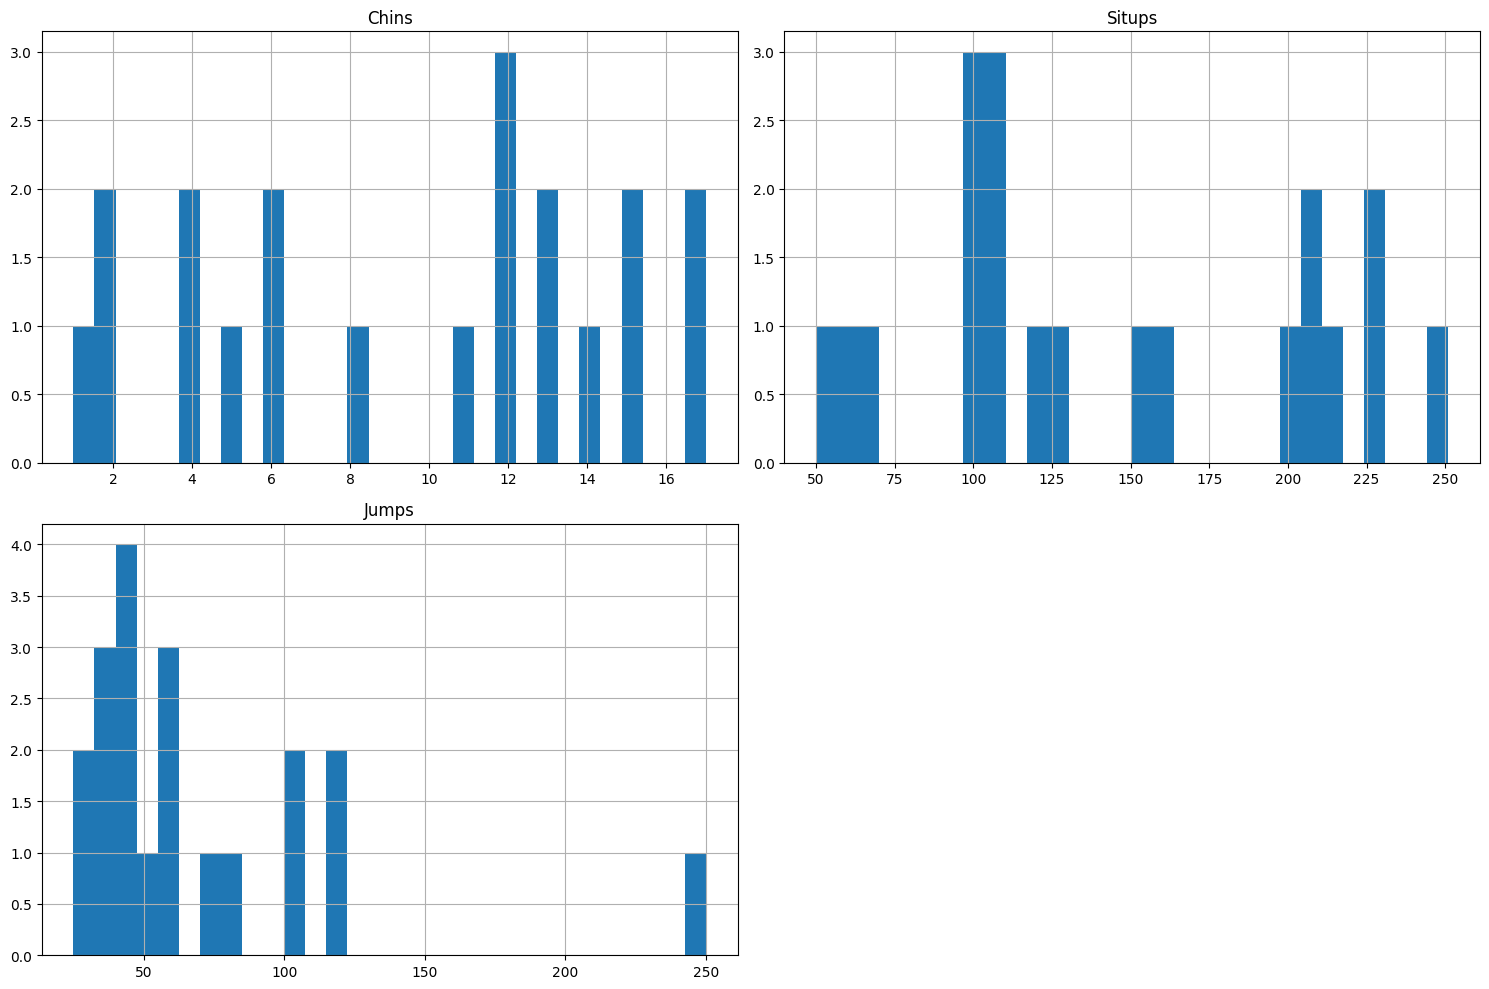

In [22]:
data_preprocessor.explorar_datos()

### 2.  División del Dataset

In [23]:
X_lin_train, X_lin_test, y_lin_train, y_lin_test = data_preprocessor.dividir_datos()

Train: (16, 3), Test: (4, 3)


## Dataset Wine

- **Descripción**: Propiedades químicas de distintos tipos de vino.
- **Variables**: 13 atributos como `alcohol`, `malic_acid`, `ash`, etc.
- **Variable objetivo**: `target` – clase del vino (3 tipos).
- **Tipo de problema**: Clasificación multiclase.

In [24]:
df_wine = pd.DataFrame(load_wine(as_frame=True).data)
df_wine.columns = load_wine(as_frame=True).feature_names
df_wine['target'] = load_wine(as_frame=True).target
df_wine['target'] = df_wine['target'].astype(str)

In [25]:
data_preprocessor = Preprocesador(df_wine, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+--------+
|   | alcohol | malic_acid | ash  | alcalinity_of_ash | magnesium | total_phenols | flavanoids | nonflavanoid_phenols | proanthocyanins | color_intensity | hue  | od280/od315_of_diluted_wines | proline | target |
+---+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+--------+
| 0 |  14.23  |    1.71    | 2.43 |       15.6        |   127.0   |      2.8      |    3.06    |         0.28         |      2.29       |      5.64       | 1.04 |             3.92             | 1065.0  |   0    |
| 1 |  13.2   |    1.78    | 2.14 |       11.2        |   100.0   |     2.65      |    2.76    |         0.26         |      1.28       |      4.38 

 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

 Estadísticas descriptivas:

+-------+--------------------+--------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------------------+--------------------+--------------------+---------------------+------------------------------+-------------------+
|       |      alcohol       |     malic_acid     |         ash         | alcalinity_of_ash |     magnesium      |   total_phenols    |     flavanoids     | nonflavanoid_phenols |  proanthocyanins   |  color_intensity   |         hue         | od280/od315_of_diluted_wines |      proline      |
+-------+--------------------+--------------------+---------------------+-------------------+--------------------+--------------------+--------------------+----------------------+--------------------+--------------------+---------------------+------------------------------+-------------------+
| count |       178.0        |       178.0        |        178.0        |       178.0       |       178.0        | 

 Valores nulos por columna:

+------------------------------+---------------+
|                              | Valores nulos |
+------------------------------+---------------+
|           alcohol            |       0       |
|          malic_acid          |       0       |
|             ash              |       0       |
|      alcalinity_of_ash       |       0       |
|          magnesium           |       0       |
|        total_phenols         |       0       |
|          flavanoids          |       0       |
|     nonflavanoid_phenols     |       0       |
|       proanthocyanins        |       0       |
|       color_intensity        |       0       |
|             hue              |       0       |
| od280/od315_of_diluted_wines |       0       |
|           proline            |       0       |
|            target            |       0       |
+------------------------------+---------------+


 Valores duplicados:

Duplicados: 0


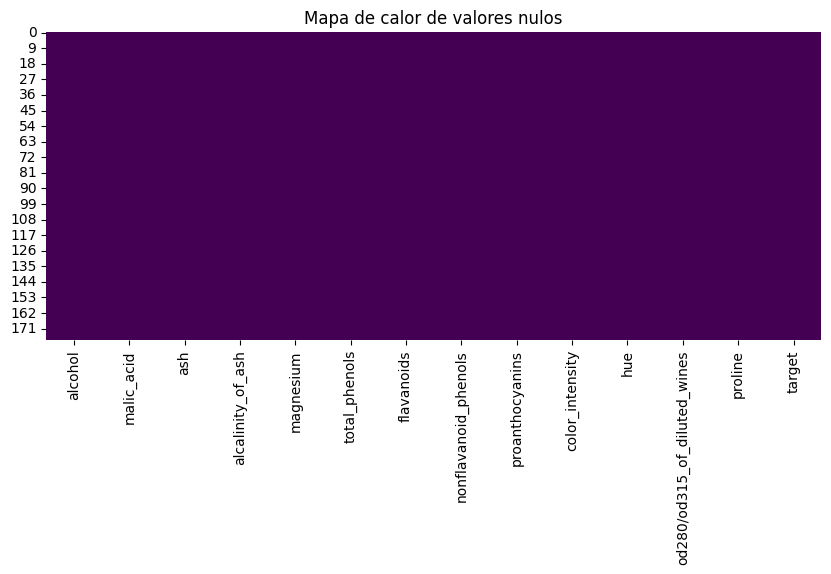

 Distribución de clases en la variable objetivo:

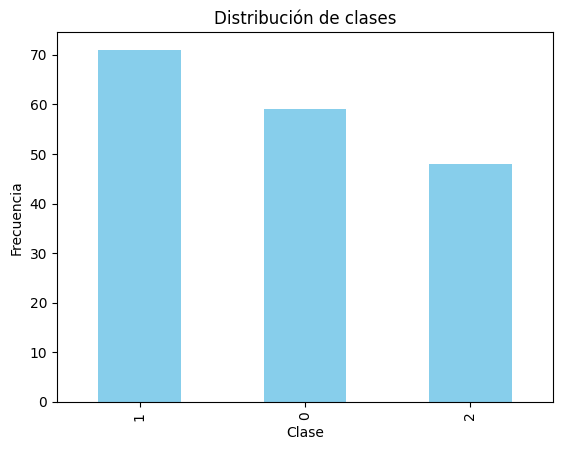

 Columnas categóricas:

[]


 Columnas numéricas:

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


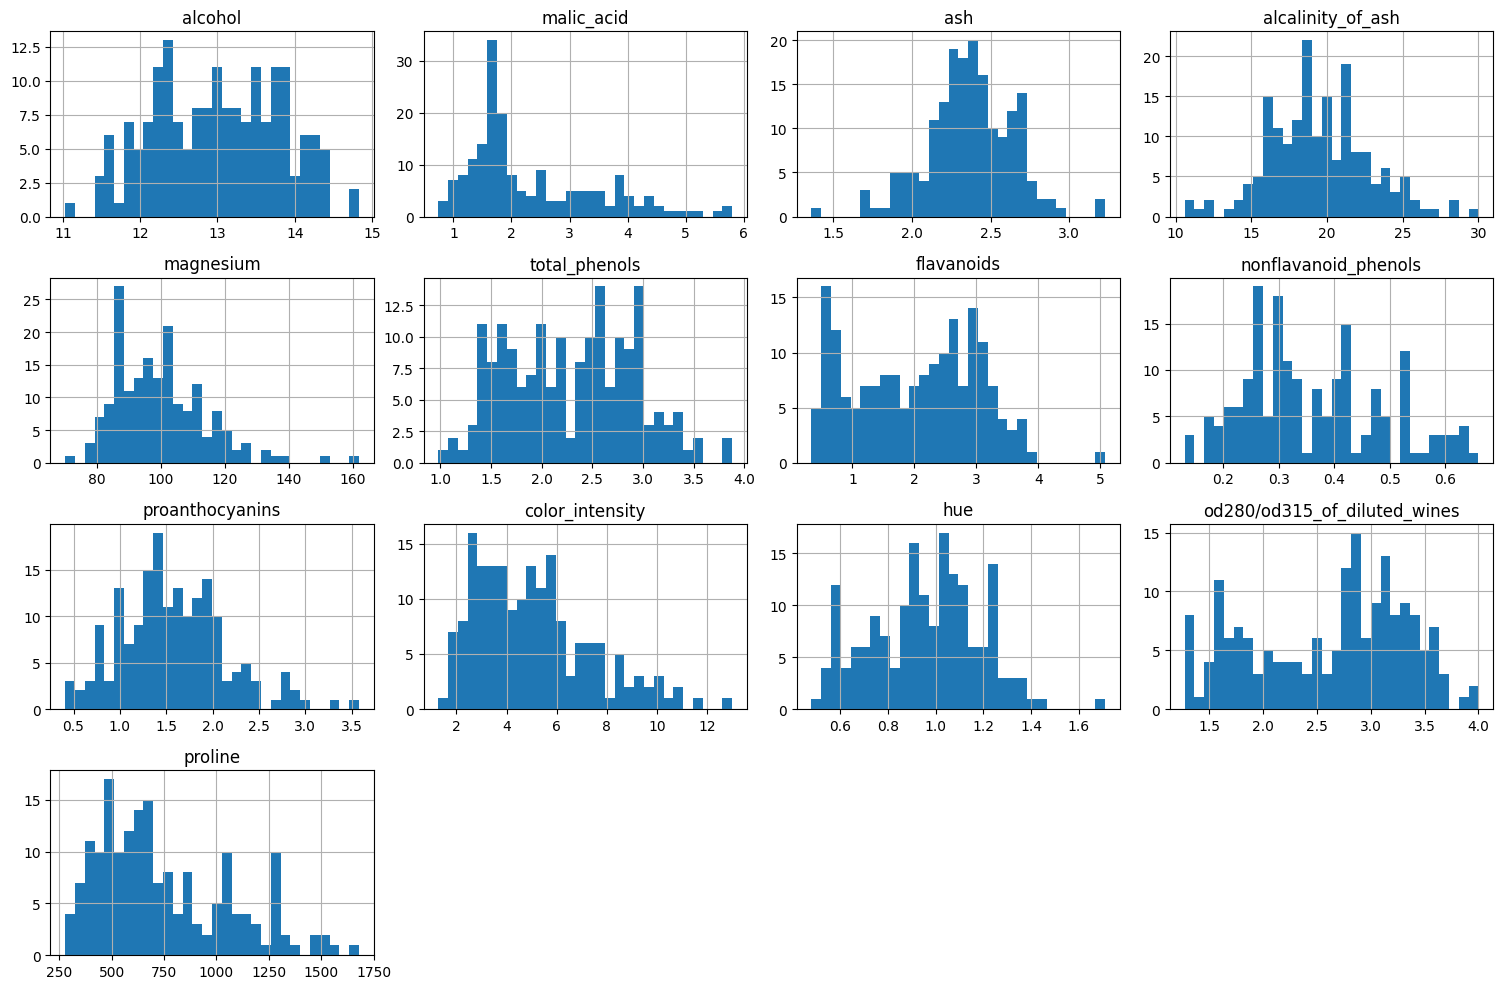

 Outliers detectados por z-score (>3):

+------------------------------+----------------+
|                              | Outliers (z>3) |
+------------------------------+----------------+
|           alcohol            |       0        |
|          malic_acid          |       1        |
|             ash              |       3        |
|      alcalinity_of_ash       |       1        |
|          magnesium           |       2        |
|        total_phenols         |       0        |
|          flavanoids          |       1        |
|     nonflavanoid_phenols     |       0        |
|       proanthocyanins        |       1        |
|       color_intensity        |       1        |
|             hue              |       1        |
| od280/od315_of_diluted_wines |       0        |
|           proline            |       0        |
+------------------------------+----------------+


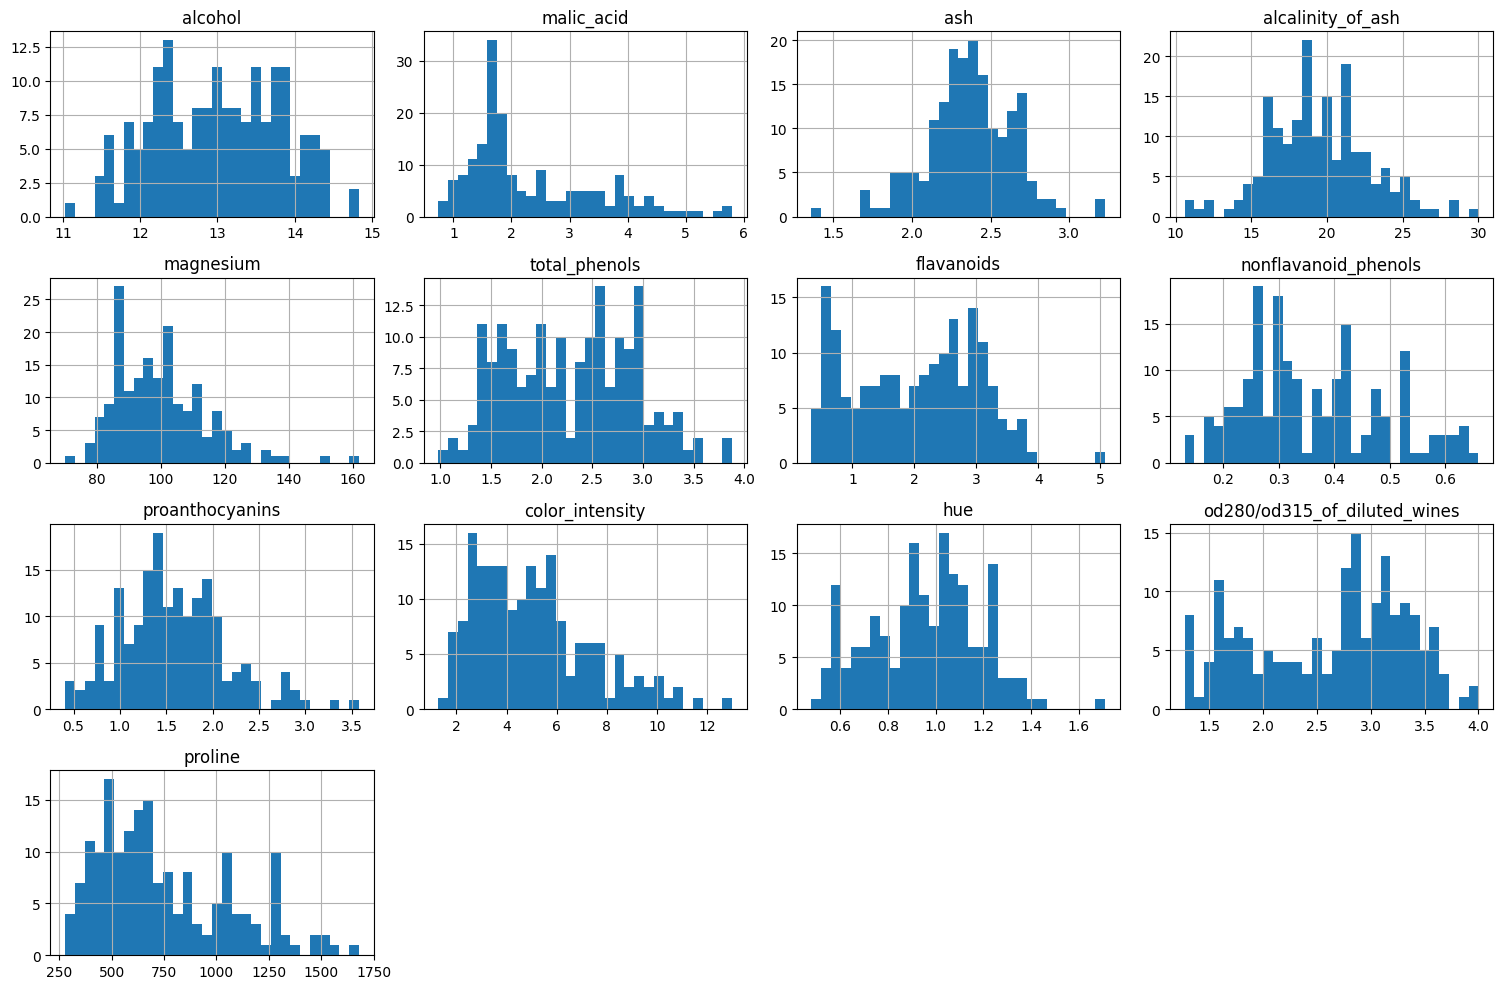

In [26]:
data_preprocessor.explorar_datos()

### 2. Reducción de Dimensionalidad

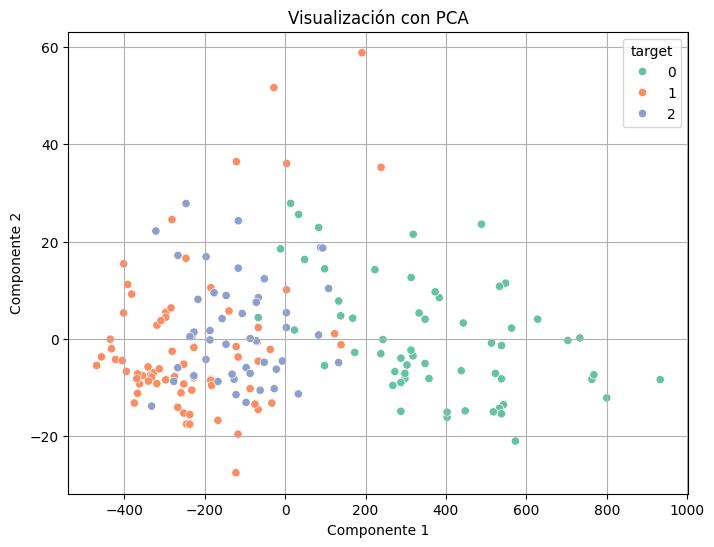

In [27]:
data_preprocessor.reducir_dimensionalidad()

### 3.  División del Dataset

In [28]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = data_preprocessor.dividir_datos()

Train: (142, 13), Test: (36, 13)


## Dataset Breast Cancer

- **Descripción**: Mediciones de características celulares de tumores mamarios.
- **Variables**: 30 atributos como `mean radius`, `texture`, `area`, `concavity`, etc.
- **Variable objetivo**: `target` – 0 (maligno) o 1 (benigno).
- **Tipo de problema**: Clasificación binaria.

In [29]:
df_cancer = pd.DataFrame(load_breast_cancer(as_frame=True).data)
df_cancer.columns = load_breast_cancer(as_frame=True).feature_names
df_cancer['target'] = load_breast_cancer(as_frame=True).target
df_cancer['target'] = df_cancer['target'].astype(str)

In [30]:
data_preprocessor = Preprocesador(df_cancer, 'target')

### 1. Exploración de los datos

 Primeras filas del dataset:

+---+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+--------+
|   | mean radius | mean texture | mean perimeter | mean area | mean smoothness | mean compactness | mean concavity | mean concave points | mean symmetry | mean fractal dimension | radius error | texture error | perimeter error | area error | smoothness error | compactness error | concavity error | concave points error | symmetry error | fractal dimension error | worst radius | worst texture | worst perimeter | worst area | worst smooth

 Info del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

 Estadísticas descriptivas:

+-------+--------------------+--------------------+--------------------+-------------------+---------------------+----------------------+---------------------+----------------------+----------------------+------------------------+---------------------+--------------------+--------------------+-------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+-------------------------+--------------------+--------------------+--------------------+-------------------+----------------------+---------------------+---------------------+----------------------+----------------------+-------------------------+
|       |    mean radius     |    mean texture    |   mean perimeter   |     mean area     |   mean smoothness   |   mean compactness   |   mean concavity    | mean concave points  |    mean symmetry     | mean fractal dimension |    radius error     |   texture error    |  perimeter error   |    area error     |   smoot

 Valores nulos por columna:

+-------------------------+---------------+
|                         | Valores nulos |
+-------------------------+---------------+
|       mean radius       |       0       |
|      mean texture       |       0       |
|     mean perimeter      |       0       |
|        mean area        |       0       |
|     mean smoothness     |       0       |
|    mean compactness     |       0       |
|     mean concavity      |       0       |
|   mean concave points   |       0       |
|      mean symmetry      |       0       |
| mean fractal dimension  |       0       |
|      radius error       |       0       |
|      texture error      |       0       |
|     perimeter error     |       0       |
|       area error        |       0       |
|    smoothness error     |       0       |
|    compactness error    |       0       |
|     concavity error     |       0       |
|  concave points error   |       0       |
|     symmetry error      |       0       |
| fractal dimension error |     

 Valores duplicados:

Duplicados: 0


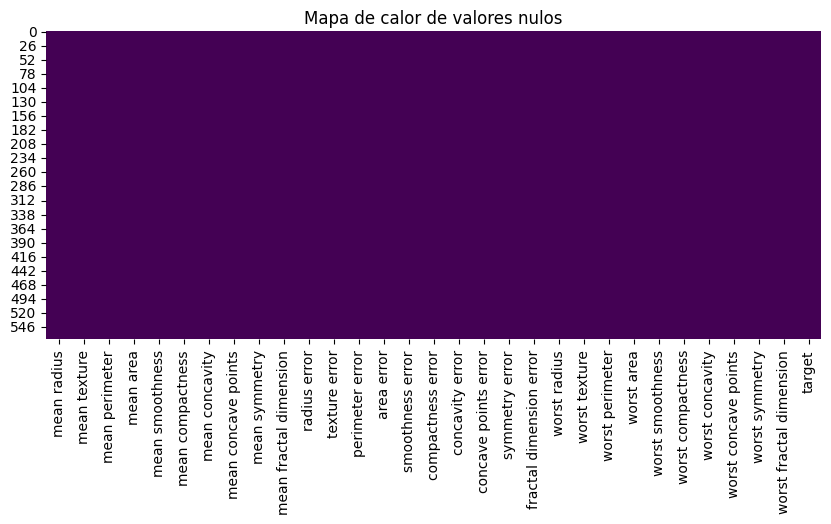

 Distribución de clases en la variable objetivo:

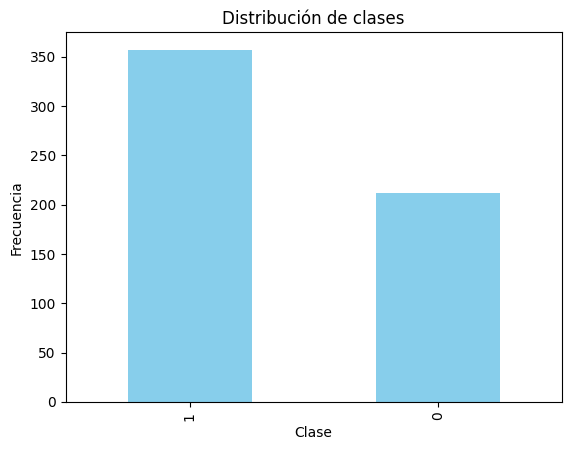

 Columnas categóricas:

[]


 Columnas numéricas:

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


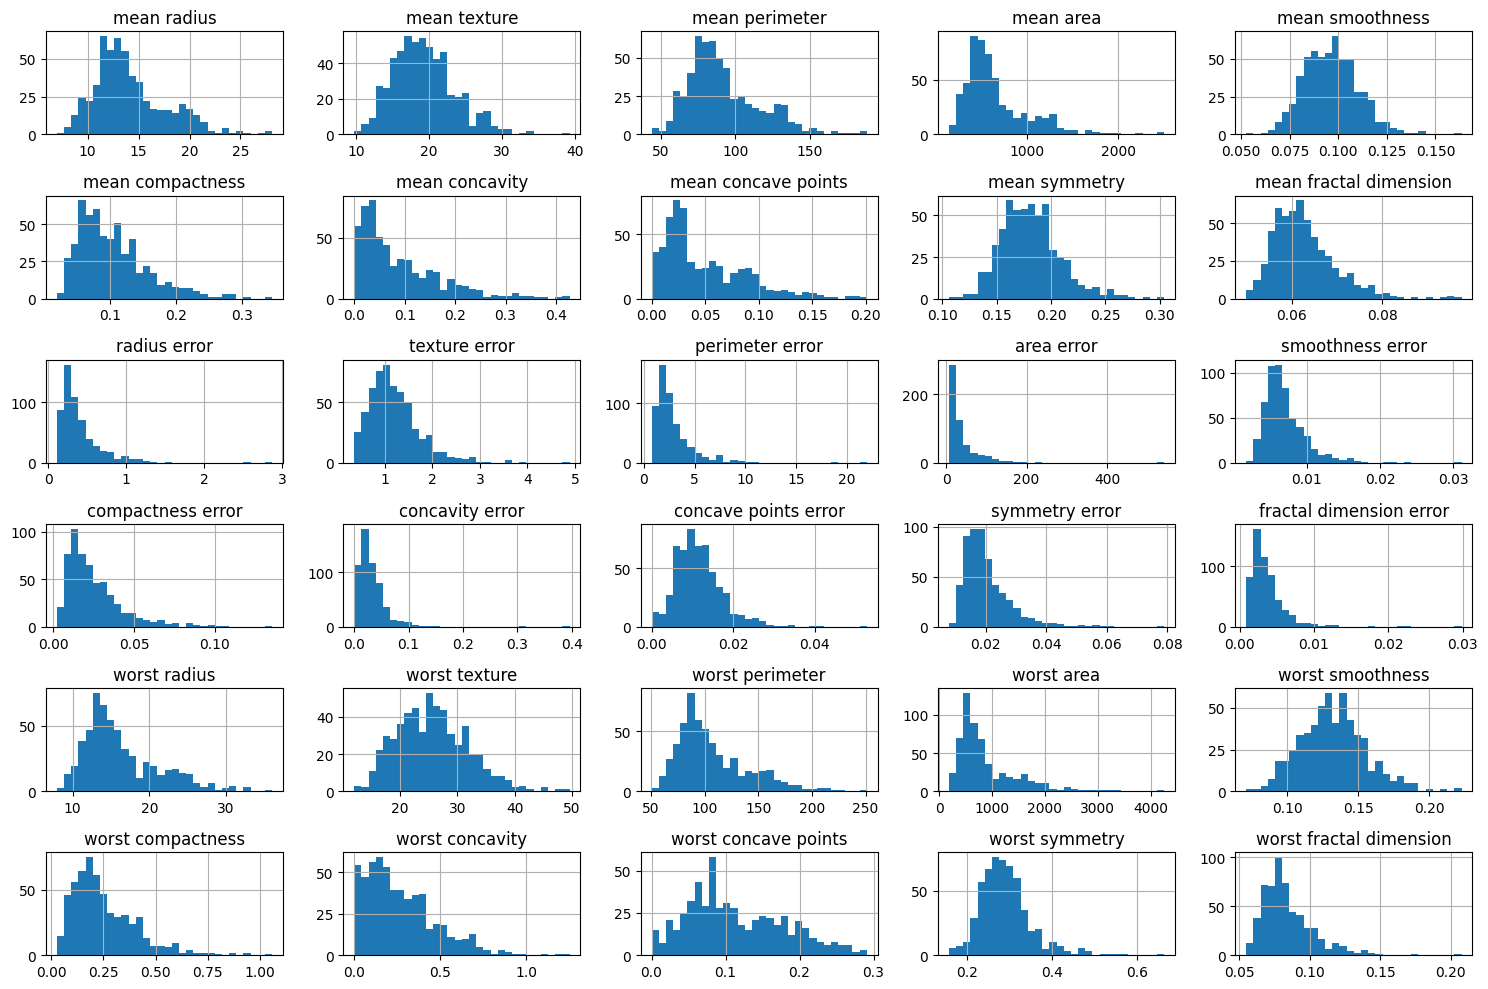

 Outliers detectados por z-score (>3):

+-------------------------+----------------+
|                         | Outliers (z>3) |
+-------------------------+----------------+
|       mean radius       |       5        |
|      mean texture       |       4        |
|     mean perimeter      |       7        |
|        mean area        |       8        |
|     mean smoothness     |       5        |
|    mean compactness     |       9        |
|     mean concavity      |       9        |
|   mean concave points   |       6        |
|      mean symmetry      |       5        |
| mean fractal dimension  |       7        |
|      radius error       |       7        |
|      texture error      |       9        |
|     perimeter error     |       8        |
|       area error        |       6        |
|    smoothness error     |       7        |
|    compactness error    |       12       |
|     concavity error     |       6        |
|  concave points error   |       6        |
|     symmetry error      |       11       |
| fractal 

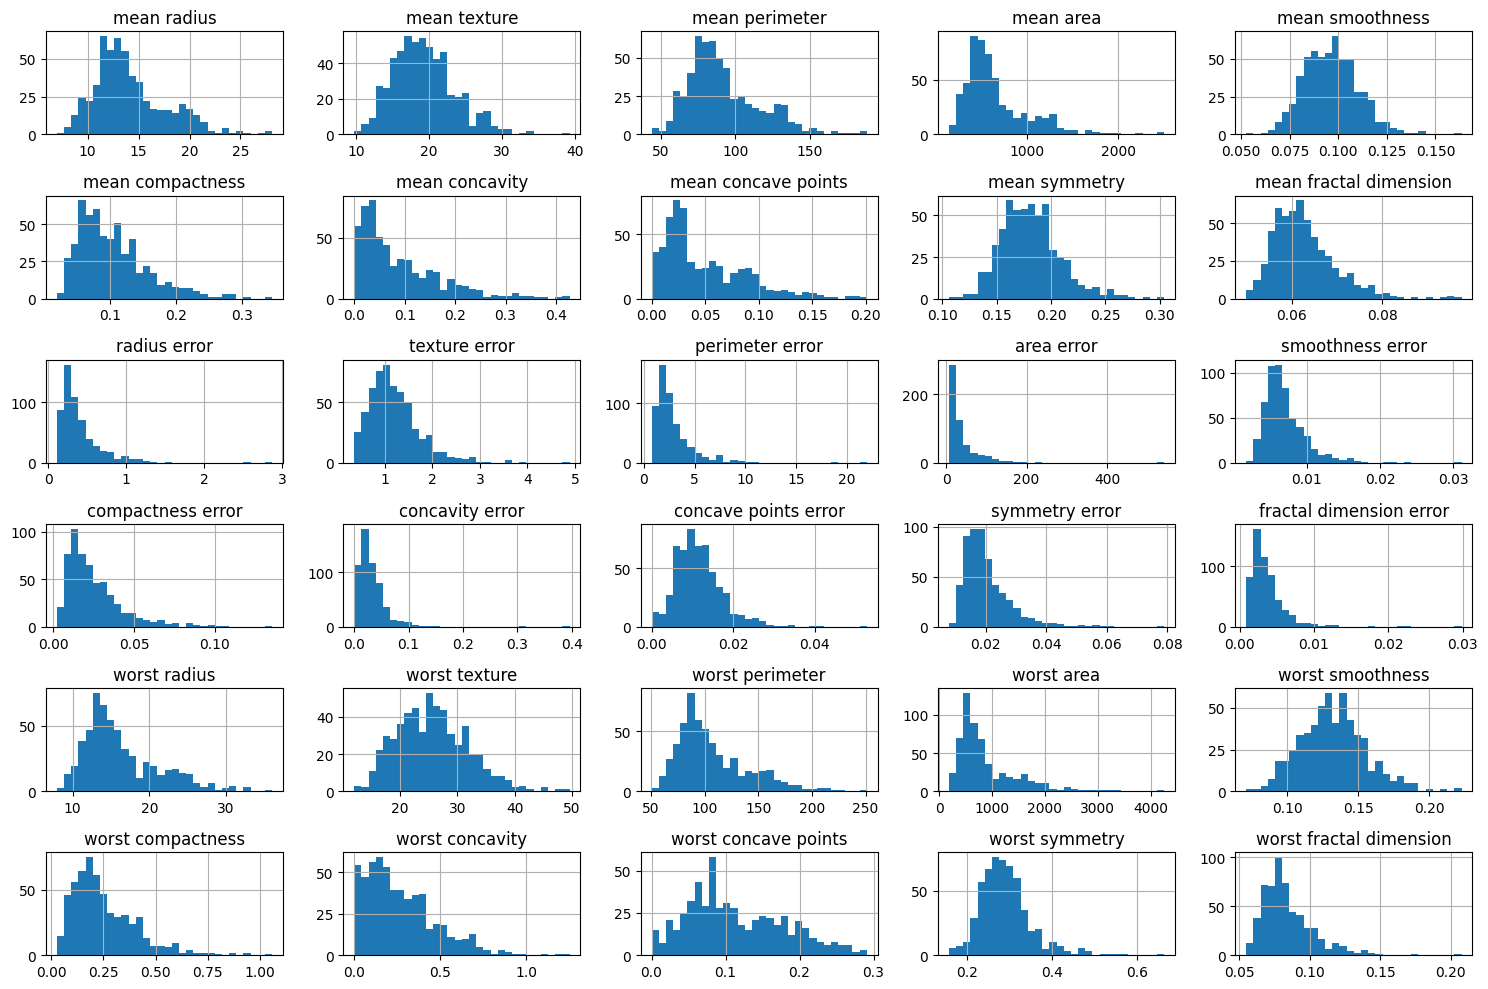

In [31]:
data_preprocessor.explorar_datos()

### 2. Reducción de Dimensionalidad

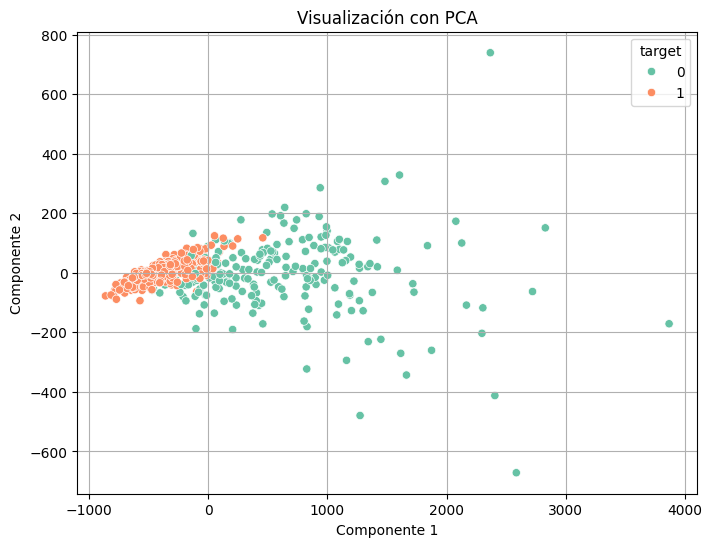

In [32]:
data_preprocessor.reducir_dimensionalidad()

### 3. Manejo de Datos Desbalanceados

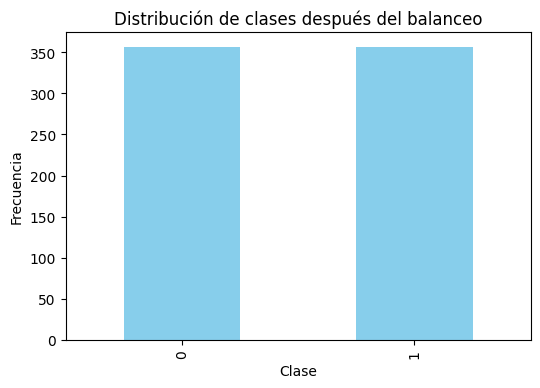

In [33]:
data_preprocessor.balancear_clases()

### 4.  División del Dataset

In [34]:
X_breast_cancer_train, X_breast_cancer_test, y_breast_cancer_train, y_breast_cancer_test = data_preprocessor.dividir_datos()

Train: (571, 30), Test: (143, 30)
